In [32]:
# import import_ipynb
# %run data_analysis_function.ipynb


# pd.datetime(df.column, unit ='ms')

# RWWIHOBG9_V0	AEWIGHG9__P0	AEWIGHG9__T0	AEWIHO_T9AV2

In [2]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [3]:
# import data_analysis_function
a=None

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [2]:
import json
#import collections
import os
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

from dataset_analysis import read_dataframe, create_dateTime, create_month
from dataset_analysis import choose_month, drop_month_year, ascending_dataframe, rearrange_dataframe
from dataset_analysis import check_blast_furnace, check_target_column, dataframe_reset_index
from dataset_analysis import drop_nan_value, drop_unique_valued_columns, drop_string_column, dataframe_datetime
from dataset_analysis import free_dataframe_from_outlier, free_target_column_from_outlier, gaussian_curve, draw_gaussian_curve

#from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import score_checking_with_cross_validation
# from dataset_analysis import dataframe_date_time_type
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

from model_file import make_dataset, scikit_learn_model
from model_file import plot_graph, evaluation_metrices
from model_file import NN_model
from model_file import make_dataset_LSTM, split_sequence, LSTM_model, plot_history, vanilla_lstm
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

from dataset_analysis import test_stationarity, tsplot_dataset, tsplot
from model_file import make_dataset_arima, StartARIMAForecasting

In [3]:
# from model_file import make_dataset, scikit_learn_model
# from model_file import plot_graph, evaluation_metrices
# from model_file import NN_model
# from model_file import make_dataset_LSTM, split_sequence, LSTM_model

In [4]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_ubuntu_1 = config['DEFAULT']['file_path_ubuntu_1']
feb_march_file = config['DEFAULT']['feb_march_file']

filepath_server_feb_march = config['DEFAULT']['file_path_server_feb_march']
filepath_server_april_may = config['DEFAULT']['file_path_server_april_may']
filepath_server_june_july = config['DEFAULT']['file_path_server_june_july']

filepath_ubuntu_feb_march = config['DEFAULT']['file_ubuntu_feb_march']
filepath_ubuntu_april_may = config['DEFAULT']['file_ubuntu_april_may']
filepath_ubuntu_june_july = config['DEFAULT']['file_ubuntu_june_july']

filepath_windows_feb_march = config['DEFAULT']['file_windows_feb_march']
filepath_windows_april_may = config['DEFAULT']['file_windows_april_may']
filepath_windows_june_july = config['DEFAULT']['file_windows_june_july']


start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
required_number_of_test_data = config['DEFAULT']['required_number_of_test_data']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
number_of_step_lstm = config['DEFAULT']['n_steps_lstm']
epochs = config['DEFAULT']['epochs']
batch_size = config['DEFAULT']['batch_size']

In [5]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder_1'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('address of created target_folder is \n: ', final_directory)
else:
    print('target_folder has already created and the address is \n',final_directory)
    pass

from datetime import date
today = date.today()
print("Today's date:", today)

current_directory is:  /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting
target_folder has already created and the address is 
 /home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/image_folder_1
Today's date: 2020-02-10


In [6]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('new metrics file creates')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('old metrics file removed and a new one is created')

old metrics file removed and a new one is created


In [7]:
# # import pandas as pd
# # count = 0
# # for data in pd.read_csv(filepath_server,encoding = 'ISO-8859-1',chunksize  = 1000):
# #     count += 1                          # counting the number of chunks
# #     lastlen = len(data)                 # finding the length of last chunk
# # datalength = (count*1000 + lastlen - 1000) # length of total file

# import multiprocessing as mp
# print("Number of processors: ", mp.cpu_count())

In [8]:
dataframe_read = read_dataframe(filepath_ubuntu)

In [9]:
print(dataframe_read.shape)

(186100, 4239)


In [10]:
dataframe_read.head(2)

longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0  1565853000000     59.919107         100.0     91.029023     99.969567   
1  1565852940000     59.919107         100.0     91.029023     99.969567   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     55.766858     89.885921     90.963652     99.089689     56.910569  ...   
1     55.766858     89.885921     90.963652     99.089689     56.910569  ...   

   RWWIHOUT10V1  RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  \
0             0     71.894489     50.087283     40.250768     73.763059   
1             0     71.902377     50.110508     40.379436     73.763059   

   RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  
0     71.201763     49.606024     38.096640      0.671974     33.111827  
1     71.276868     49.615189     38.034993      0.672205     33.060837  

[2 rows x 4239 columns]

In [ ]:
# temp_frame = initial_dataframe.iloc[-45128:,:]
# temp_frame = initial_dataframe.iloc[-85349:-45128,:]
# temp_frame = initial_dataframe.iloc[-165519:-85349,:]

In [ ]:
# temp_frame.to_csv('june_july_1.csv')

In [ ]:
# read = create_dataframe('june_july_1.csv')

In [ ]:
# read.columns.get_loc('Unnamed: 0')

In [ ]:
# read_1 = read.drop(read.columns[0], axis=1)

In [10]:
cols_list = ['longTime',furnace_signal_column_a,furnace_signal_column_b,target_column,'RWWIHOBG9_V0','AEWIGHG9__P0','AEWIGHG9__T0']
dataframe_sliced = dataframe_read.iloc[:][cols_list]

In [11]:
# dataframe_with_date = create_dateTime(dataframe_sliced,'row_ID','Unnamed: 0')
dataframe_with_date = create_dateTime(dataframe_read,'row_ID','Unnamed: 0')

In [91]:
# def distinct_month_1(dataframe, target_column,month_key):
#     array_df = []
#     for i in month_key:
#         req_data_1=dataframe.loc[(dataframe[target_column]==i)]
#         req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
        
#         array_df.append(req_frame_1)
    
#     return array_df

######################################################

In [ ]:
# def draw_month(month_key_value, dict_of_month,target_column):
#     for i in month_key_value:
#         value = dict_of_month[i]
#         value.iloc[:].plot(y=[target_column])
#         plt.title('visualization of signal ' + str(target_column) + ' in time of ' + str(i))
#         plt.xlabel('range')
#         plt.ylabel('value')

#         plt.rcParams['figure.figsize'] = (5,5)
#         plt.savefig(str(i) + '.jpg')
#         plt.show()

In [12]:
dataframe_include_month, month_array_df = create_month(dataframe_with_date, 'month', target_column) 

In [13]:
print('shape: ',dataframe_include_month.shape)

shape:  (186100, 4240)


In [14]:
dataframe_include_month.tail(2)

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
dateTime                                                                      
2019-02-11 20:58:00     72.030143     37.870419     90.988125     34.451579   
2019-02-11 20:57:00     72.030143     28.019753     90.988125     25.369044   

                     AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
dateTime                                                                      
2019-02-11 20:58:00     88.177774     90.449495     93.353135     18.897334   
2019-02-11 20:57:00     92.387543     90.208292     93.674403     10.971169   

                     AEAGHOAWE3T1  AEAGHOAWE_A2  ...  RWWIHOT8_RV0  \
dateTime                                         ...                 
2019-02-11 20:58:00     51.451800      75.60179  ...     41.687065   
2019-02-11 20:57:00     51.916376     100.00000  ...     41.687065   

                     RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
dateTime                                                                      
2019-02-11 20:58:00     39.195484     77.545509     75.505091     64.437859   
2019-02-11 20:57:00     39.000517     77.532654     75.407204     64.213670   

                     RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  month  
dateTime                                                                    
2019-02-11 20:58:00     56.966760      0.659977     20.066390  2019      2  
2019-02-11 20:57:00     57.013879      0.658391     19.815859  2019      2  

[2 rows x 4240 columns]

# If you load whole dataset then uncomment the following lines

In [15]:
# import pandas as pd
# def choose_month(dataframe, target_column_month):
#     req_data_month = dataframe.loc[(dataframe[target_column_month] == 2) | (dataframe[target_column_month] == 3)
#                                    | (dataframe[target_column_month] == 4)| (dataframe[target_column_month] == 5)
#                                    | (dataframe[target_column_month] == 6)| (dataframe[target_column_month] == 7)
#                                   | (dataframe[target_column_month] == 8)]
#     #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
#     req_frame_month = pd.DataFrame(req_data_month, columns=dataframe.columns)

#     return req_frame_month

In [16]:
# dataframe_read= None
# dataframe_with_date = None

In [ ]:
# # for i in specific_month_df['month']:
# #     print(i)

# initial_dataframe = None
# df_1 = None
# date_df = None
# specific_month_df = None
# spec_month = None
# multivariate_data = None
# rearranged_dataframe = None
# dataframe_x = None
# dataframe_y = None
# dataframe_no_zero_value_blast_furnace = None

In [17]:
# If you load the whole dataset(where Feb to Aug data is stored) and want to draw target_vs_month then uncomment the following function and run the code.
# otherwise do commenting

# import pandas as pd
# def specific_month_df(dataframe,target_column_month):
#     req_data_month=dataframe.loc[(dataframe[target_column_month]==2) | (dataframe[target_column_month]==3) |
#                                  (dataframe[target_column_month]==4)
#                                  | (dataframe[target_column_month]==5) | (dataframe[target_column_month]==6) | (dataframe[target_column_month]==7)
#                                  | (dataframe[target_column_month]==8)]
# #     req_data_month=dataframe.loc[(dataframe[target_column_month]==2|3) ]
#     req_frame_month=pd.DataFrame(req_data_month,columns=dataframe.columns)
    
#     return req_frame_month

dataframe_with_specific_month = choose_month(dataframe_include_month,'month')

In [18]:
print('shape: ', dataframe_with_specific_month.shape)

shape:  (186100, 4240)


In [19]:
# def drop_month_year(dataframe):
# #     dataframe = dataframe.drop(['year','month'], axis=1)
#     dataframe = dataframe.reset_index()
#     return dataframe

# spec_month = drop_month_year(date_df)
dataframe_with_specific_month_reset = drop_month_year(dataframe_with_specific_month)
print('shape: ', dataframe_with_specific_month_reset.shape)

shape:  (186100, 4241)


In [21]:
# spec_month = spec_month.iloc[:200,:]

dataframe_with_specific_month_reset.head(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0 2019-08-15 07:10:00     59.919107         100.0     91.029023     99.969567   
1 2019-08-15 07:09:00     59.919107         100.0     91.029023     99.969567   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
0     55.766858     89.885921     90.963652     99.089689     56.910569  ...   
1     55.766858     89.885921     90.963652     99.089689     56.910569  ...   

   RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
0     50.087283     40.250768     73.763059     71.201763     49.606024   
1     50.110508     40.379436     73.763059     71.276868     49.615189   

   RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  month  
0     38.096640      0.671974     33.111827  2019      8  
1     38.034993      0.672205     33.060837  2019      8  

[2 rows x 4241 columns]

In [ ]:
# df_2.columns.get_loc(target_column)
# print(df_2.columns[4142])
# target_df = df_2.loc[:, df_2.columns[4142]]

In [ ]:
# targ = pd.DataFrame(target_df)

In [ ]:
# df_month = pd.DataFrame(index=df_2.index)

In [ ]:
# df_month['year'] = pd.DatetimeIndex(df_month.index).year

In [ ]:
# df_month['month'] = pd.DatetimeIndex(df_month.index).month

In [ ]:
# df_month

In [ ]:
# df_month_final = pd.concat([df_month, target_df], axis=1)
# df_month_final.head()

In [ ]:
# u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
# v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
# w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
# x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
# print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


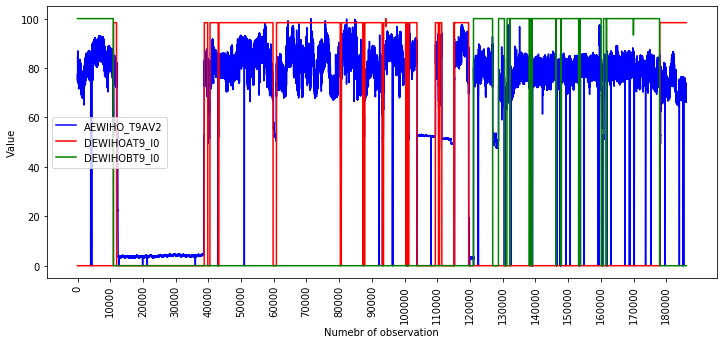

In [18]:
print(dataframe_read.shape)
plt.plot(dataframe_read[target_column], color = 'blue')
plt.plot(dataframe_read[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_read[furnace_signal_column_b], color = 'green')
plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# plt.xlim(0,dataframe_read.shape[0]+10)
plt.xticks(np.arange(0,dataframe_read.shape[0],10000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('blast_vs_target_pre.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12,5)

In [22]:
dataframe_ascending = ascending_dataframe(dataframe_with_specific_month_reset, start_pos,dataframe_with_specific_month_reset.shape[0]) 

In [23]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]


dataframe_rearranged = rearrange_dataframe(dataframe_ascending,req_column_name,index_array)

# Before cleaning any column draw target vs month

In [24]:
# dataframe_with_specific_month = None
# dataframe_with_specific_month_reset = None
# dataframe_ascending = None

In [25]:
dataframe_rearranged_copy = dataframe_rearranged.copy()
import calendar
dataframe_rearranged_copy['month_name'] = dataframe_rearranged_copy['month'].apply(lambda x: calendar.month_abbr[x])

dataframe_rearranged_copy.head(2)

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
186099 2019-02-11 20:57:00     72.030143     28.019753     90.988125   
186098 2019-02-11 20:58:00     72.030143     37.870419     90.988125   

        AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
186099     25.369044     92.387543     90.208292     93.674403     10.971169   
186098     34.451579     88.177774     90.449495     93.353135     18.897334   

        AEAGHOAWE3T1  ...  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  \
186099     51.916376  ...     39.000517     77.532654     75.407204   
186098     51.451800  ...     39.195484     77.545509     75.505091   

        RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  year  \
186099     64.213670     57.013879      0.658391     19.815859  2019   
186098     64.437859     56.966760      0.659977     20.066390  2019   

        AEWIHO_T9AV2  month_name  
186099     66.387058         Feb  
186098     66.765225         Feb  

[2 rows x 4242 columns]

In [26]:
import collections
import calendar
def draw_target_vs_month(dataframe, month_key_value, dict_of_month, target_column):
    for i in month_key_value:
#         print('i: ',i)
        value = dict_of_month[i]
#         print('value: ',type(value))
#         print(value.head(1))
        value.iloc[:].plot(x = value.columns[0],y=[target_column])
        plt.title('visualization of signal ' + str(target_column) + ' in the month of ' + str(i))
        plt.xlim(value[value.columns[0]].min(), value[value.columns[0]].max())
#         plt.xlim(value.index.min(), value.index.max())
        plt.xlabel('Date Range')
        plt.ylabel('Value')

        plt.rcParams['figure.figsize'] = (12, 5)
        plt.savefig(final_directory+ '/'+str(i) + '.jpg')
        plt.show()
    

def month_collection(dataframe, target_column):
#     dict_of_month = {k: v for k, v in dataframe.groupby('month')}
    dict_of_month = {k: v for k, v in dataframe.groupby('month_name')}
    month_key_value = collections.OrderedDict(dict_of_month)
    draw_month_fig = draw_target_vs_month(dataframe,month_key_value, dict_of_month, target_column)

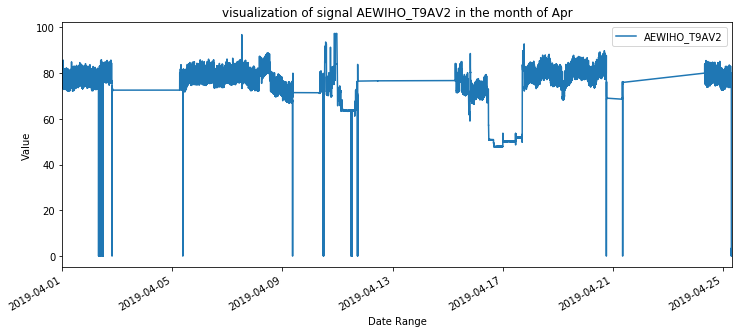

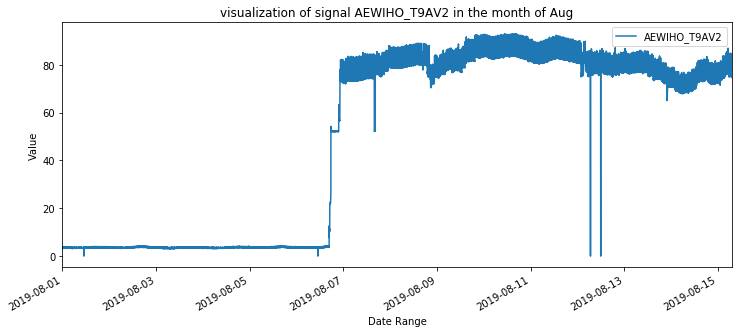

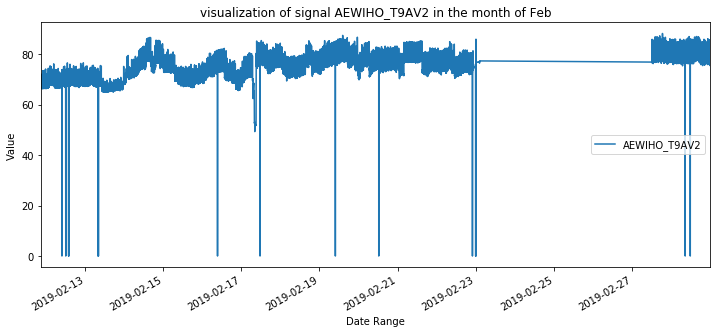

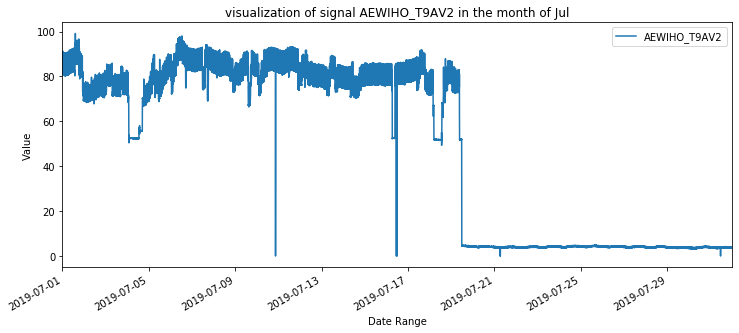

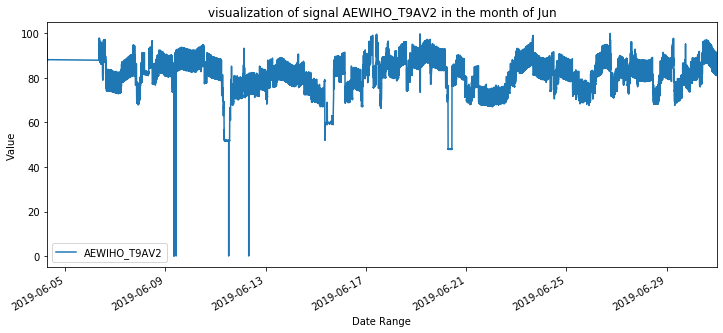

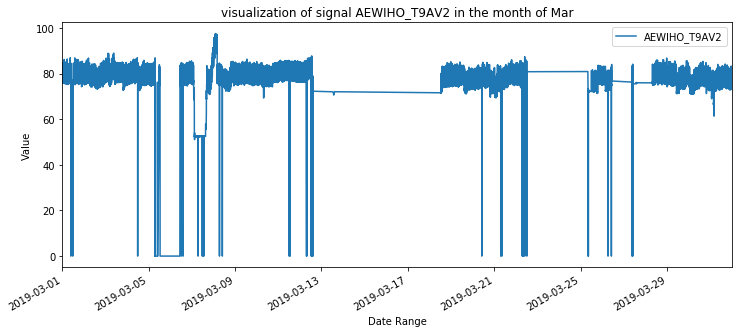

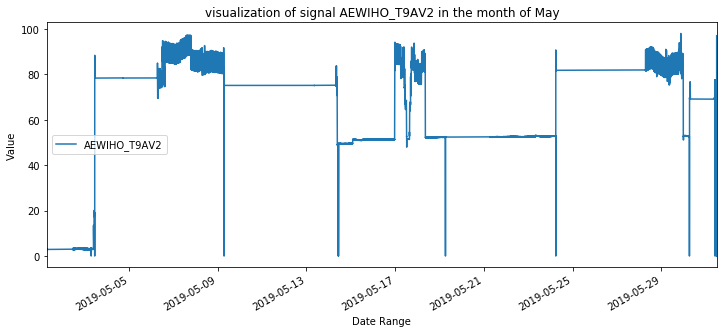

In [28]:
draw_target_month = month_collection(dataframe_rearranged_copy, target_column)

In [101]:
dataframe_rearranged[dataframe_rearranged.columns[0]].max()
# dataframe_rearranged.index.max()

Timestamp('2019-08-15 07:10:00')

In [19]:
dataframe_clean_furnace_column = check_blast_furnace(dataframe_rearranged, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

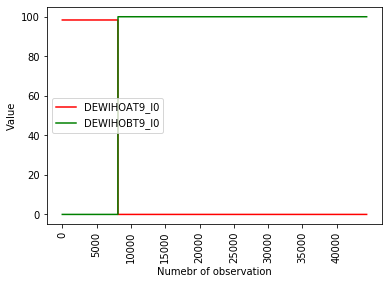

(44355, 4241)


In [20]:
plt.plot(dataframe_clean_furnace_column[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_clean_furnace_column[furnace_signal_column_b],'green')
plt.legend([furnace_signal_column_a, furnace_signal_column_b], loc='center left')
#plt.xlim(0,dataframe_clean_furnace_column.shape[0]+1000)
plt.xticks(np.arange(0,dataframe_clean_furnace_column.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
#plt.savefig('furnace_column.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] = (12, 5)
plt.show()

print(dataframe_clean_furnace_column.shape)

In [ ]:
# dataframe_x = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_y = dataframe_x.drop(['index'], axis=1)

In [ ]:
# print(dataframe_y.shape)
# plt.plot(dataframe_y[target_column], color = 'blue')
# plt.plot(dataframe_y[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_y[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='best')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,dataframe_y.shape[0],5000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# plt.savefig('blast_vs_target_vanish_furnace_zero.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12,5)

In [ ]:
# no_zero_furnace_1 = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
#                                                                furnace_signal_column_b, value_B)

In [ ]:
# no_zero_furnace_1.dtypes

In [ ]:
# print(no_zero_furnace.shape)
# print(type(no_zero_furnace))

# print(no_zero_furnace_1.shape)
# print(type(no_zero_furnace_1))


# rearranged_dataframe.head()

In [ ]:
# new_frame = pd.concat([first_col, sec_col], axis=1)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)

In [ ]:
# for i in rearranged_dataframe:
#     if rearranged_dataframe[i].dtypes == '<M8[ns]' or rearranged_dataframe[i].dtypes == 'object':
# #         rearranged_dataframe.loc[:,i].apply(pd.to_numeric)
        
#         print(i)
    

In [ ]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [23]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target_1(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

# dataframe_no_zero_value_target_column = None

In [24]:
# import pandas as pd
# def no_zero_value_in_target_11(dataframe, target_column, req_drop_value_target):
# #     req_data_1=dataframe.loc[(dataframe[target_column]!=req_drop_value_target)]
# #     req_data_1 = dataframe.loc[(dataframe[target_column]>=60)]
#     req_data_1 = dataframe.loc[(dataframe[target_column]>=60) & (dataframe[target_column]<=90)]
#     req_frame_1=pd.DataFrame(req_data_1,columns=dataframe.columns)
    
#     return req_frame_1

# data_target_new_condition = no_zero_value_in_target_11(dataframe_no_zero_value_blast_furnace,target_column,60)
# print(data_target_new_condition.shape)
# data_target_new_condition.dtypes

In [25]:
# # dataframe_no_zero_value_target_column_2 = dataframe_reset_index(dataframe_no_zero_value_target_column)
# dataframe_no_zero_value_target_column_2 = dataframe_reset_index(data_target_new_condition)
# print(dataframe_no_zero_value_target_column_2.shape)

In [26]:
# plt.plot(dataframe_no_zero_value_target_column_2[target_column], color = 'blue')
# plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_zero_value_target_column_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='center left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,dataframe_no_zero_value_target_column_2.shape[0],5000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.savefig('blast_vs_target_post.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

In [ ]:
# qq = dataframe_no_zero_value_target_column.apply(pd.to_numeric)

In [ ]:
# qq['dateTime'].dtypes

In [ ]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [ ]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [21]:
# Drop the ROW which has NAN value

dataframe_drop_nan = drop_nan_value(dataframe_clean_furnace_column)
dataframe_drop_unique_valued_column = drop_unique_valued_columns(dataframe_drop_nan)
dataframe_drop_string = drop_string_column(dataframe_drop_unique_valued_column)
print(dataframe_drop_string.shape)
dataframe_drop_string.dtypes

(44355, 2924)


dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2924, dtype: object

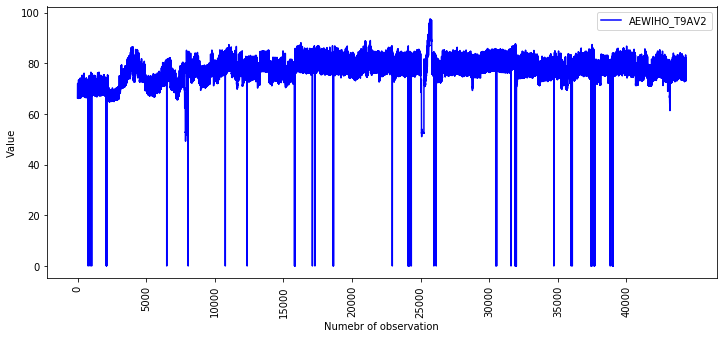

In [22]:
plt.plot(dataframe_drop_string[target_column], color = 'blue')
# plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_drop_string.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column_before_removing_outlier.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# nunique = multivariate_data_drop_nan.apply(pd.Series.nunique)
# cols_to_drop = nunique[nunique == 1].index
# dataframe_drop_column_with_same_value = multivariate_data_drop_nan.drop(cols_to_drop, axis=1)

In [29]:
# dataframe_drop_column_with_same_value = drop_unique_valued_columns(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_column_with_same_value = drop_column_with_same_value(multivariate_data_drop_nan)

In [ ]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [30]:
# Drop the column who has 'objet' type value
# dataframe_no_string = drop_string_column(dataframe_drop_column_with_same_value)

In [31]:
# dataframe_no_string.dtypes

In [29]:
# initial_dataframe = None
# date_df = None
# specific_month_df = None
# spec_month = None
# rearranged_dataframe = None
# multivariate_data = None
# dataframe_no_zero_value_blast_furnace = None
# dataframe_no_zero_value_target_column = None
# multivariate_data_drop_nan = None
# dataframe_drop_column_with_same_value = None

In [ ]:
# dataframe_drop_row_consecutive_same_value = drop_row(dataframe_no_string)

In [33]:
# print(dataframe_no_string.shape)

# plt.plot(dataframe_no_string[target_column], color = 'blue')
# # plt.plot(dataframe_no_string[furnace_signal_column_a], color = 'red')
# # plt.plot(dataframe_no_string[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.legend([target_column], loc='best')
# plt.xticks(np.arange(0,dataframe_no_string.shape[0],1000),rotation='vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.savefig('final_target_column.png',bbox_inches='tight')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (12, 5)

# drop column who has always same value

In [ ]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [ ]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [ ]:
# print(dataframe_drop_column_with_same_value.shape)
# print(multivariate_data_drop_nan.shape)
# print(dataframe_drop_row_consecutive_same_value.shape)
# print(dataframe_no_string.shape)
# print(new_frame.shape)

In [23]:
dataframe_drop_string.dtypes

dateTime        datetime64[ns]
AEAGHOAWE2T1           float64
AEAGHOAWE2A0           float64
AEAGHOAWE2T0           float64
AEAGHOAWE1A0           float64
                     ...      
RWWIHOTSUMV0           float64
RWWIHO_VERV0           float64
RWWIHO_UESV0           float64
RWWIHOSUMAV0           float64
AEWIHO_T9AV2           float64
Length: 2924, dtype: object

In [24]:
# Make dataframe with dateTime index


dataframe_datetime = dataframe_datetime(dataframe_drop_string) # make dateTime as index
print(dataframe_datetime.shape)

(44355, 2923)


In [25]:
dataframe_datetime.shape

(44355, 2923)

# drop outlier from whole dataframe/specific column of dataframe

In [26]:
# function to remove outlier from a single column
dataframe_target_column_free_from_outlier = free_target_column_from_outlier(dataframe_datetime, target_column)


print(dataframe_target_column_free_from_outlier.shape)
#plt.plot(dataframe_target_column_free_from_outlier[target_column])
# dataframe_target_column_free_from_outlier.describe()
# print(dataframe_target_column_free_from_outlier.max())

(43953, 2923)


(43953, 2924)


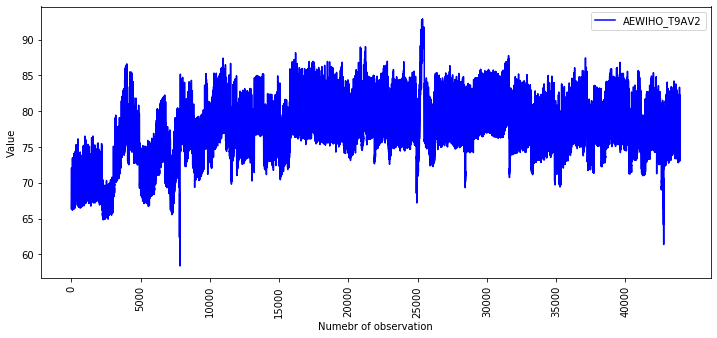

In [27]:
# =============================================================================
# plot dataframe where target column free from outlier by resetting index as it is easy to interpret
# =============================================================================
dataframe_target_column_free_from_outlier_copy = dataframe_target_column_free_from_outlier.copy()
dataframe_reset_target_column_free_from_outlier = dataframe_target_column_free_from_outlier_copy.reset_index()
print(dataframe_reset_target_column_free_from_outlier.shape)
plt.plot(dataframe_reset_target_column_free_from_outlier[target_column], color = 'blue')
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_reset_target_column_free_from_outlier.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('final_target_column_after_removing_outlier.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

# function to remove outlier from a whole dataframe

(11, 2923)


/home/atif/iai_ml_venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


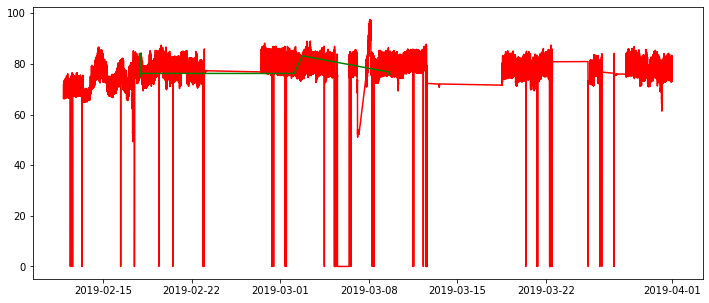

385


In [28]:
dataframe_free_from_outlier = free_dataframe_from_outlier(dataframe_datetime) 
print(dataframe_free_from_outlier.shape)

plt.plot(dataframe_datetime[target_column], color ='red')
plt.plot(dataframe_free_from_outlier[target_column], color = 'green')
plt.show()

dataframe_free_from_outlier.describe()
dataframe_target_column_free_from_outlier.describe()
count =0
for i in dataframe_datetime[target_column]:
    if i < 62.48:
        count +=1
print(count)

arr =[]
for i in dataframe_datetime.columns:
    arr.append(i)

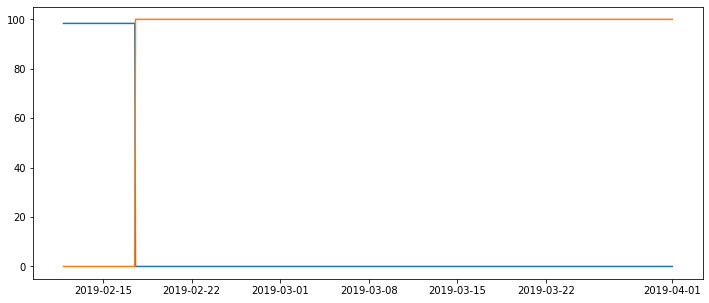

In [95]:
plt.plot(dataframe_datetime[furnace_signal_column_a])
plt.plot(dataframe_datetime[furnace_signal_column_b])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1b7802c8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1b7802ceb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1b7802c6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1b6bc41518>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1b6bc41828>],
 'means': []}

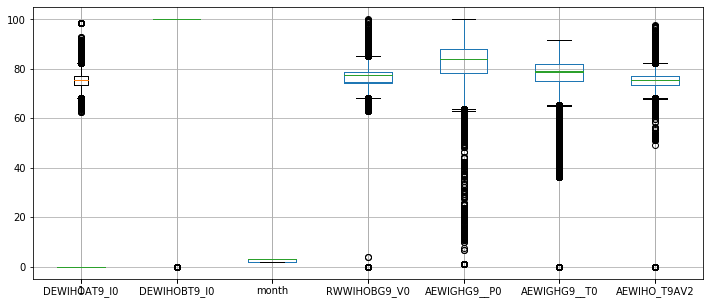

In [31]:
boxplot_dateTime = dataframe_datetime.boxplot(column = arr)
boxplot_target_column_free_from_outlier = dataframe_target_column_free_from_outlier.boxplot(column=arr)
boxplot_dataframe_free_from_outlier = dataframe_free_from_outlier.boxplot(column=arr)

plt.boxplot(dataframe_free_from_outlier[target_column])

In [48]:
# for column in dataframe_datetime:
#     plt.figure()
#     if column == dataframe_datetime.columns[-1]:
#         break
#     else:
#         dataframe_datetime.boxplot(by = dataframe_datetime.columns[-1],column = column)

In [33]:
# Feature selection with Sklearn feature best technique
# sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [34]:
# feature selection with Pearson Correlation.
# sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [28]:
# correlation_csv = main_correlation.to_csv('high_correlation_feb_march_april_may.csv')
main_correlation = pearson_correlation(dataframe_target_column_free_from_outlier)

main_frame = dataframe_target_column_free_from_outlier
correlated_frame = main_correlation
print(main_frame.shape)
print(correlated_frame.shape)
# print(correlated_frame)

(43953, 2923)
(2923, 2923)


In [29]:
# dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')
dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

print(dataframe_high_correlation.shape)
dataframe_high_correlation.describe()

(43953, 4)


RWWIHOBG9_V0  AEWIGHG9__P0  AEWIGHG9__T0  AEWIHO_T9AV2
count  43953.000000  43953.000000  43953.000000  43953.000000
mean      64.233875     82.039010     77.881654     75.393140
std       30.286365      8.572489      5.662907      4.109084
min        0.000000      9.853600     37.072978     58.370486
25%       74.606240     78.331123     75.194708     73.412798
50%       77.342536     84.039662     78.969481     75.581076
75%       78.840011     88.142640     81.826243     77.016193
max       95.316354    100.000000     91.486047     92.908761

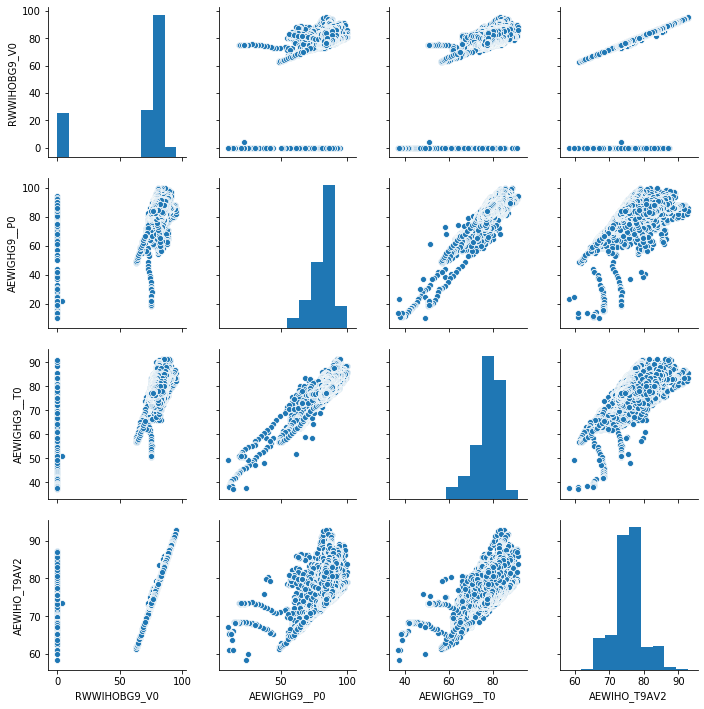

In [30]:
import seaborn as sns
sns.pairplot(dataframe_high_correlation)
# plt.savefig('updated_correlation_plot.png')

# check correlation with SPEARMAN correlation technique

In [33]:
spearman_corr = dataframe_target_column_free_from_outlier.corr(method='spearman')
print(spearman_corr.shape)

(2923, 2923)


In [34]:
# dataframe_datetime.to_csv('dataframe_datetime_feb_march_april_may.csv')
dataframe_high_correlation_spearman = make_dataframe_with_high_correlated_value(main_frame,spearman_corr,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

print(dataframe_high_correlation_spearman.shape)
dataframe_high_correlation_spearman.describe()

(43953, 10)


RWDAHOBG9_V0  AEDAHO_T9_V2  RWDATZ_HO_V1  RWWIHOBK__T0  AEWIGHG9__P0  \
count  43953.000000  43953.000000  43953.000000  43953.000000  43953.000000   
mean      59.329459     69.423720     42.338497     75.294005     82.039010   
std       28.516608      8.388083      4.285740     12.508189      8.572489   
min        0.000000      0.000000      6.444072      0.000000      9.853600   
25%       65.210512     66.115509     40.736564     73.691625     78.331123   
50%       71.149856     70.782508     43.015443     77.345255     84.039662   
75%       75.191402     74.534058     44.838016     80.249678     88.142640   
max       99.975335     98.973455     56.267074     89.118329    100.000000   

       AEWIGHG9__T0  AEWIHOBM__P0  AEWIHOBK__T0  AEWIHOBKVSP0  AEWIHO_T9AV2  
count  43953.000000  43953.000000  43953.000000  43953.000000  43953.000000  
mean      77.881654     77.906705     76.175272     78.329101     75.393140  
std        5.662907     13.549878      7.758865     13.564108      4.109084  
min       37.072978      0.112205      0.000000      0.011677     58.370486  
25%       75.194708     75.403443     73.739186     75.729282     73.412798  
50%       78.969481     80.452590     77.347112     80.866963     75.581076  
75%       81.826243     84.529636     80.245075     85.113296     77.016193  
max       91.486047     96.965914     89.235634     97.191479     92.908761

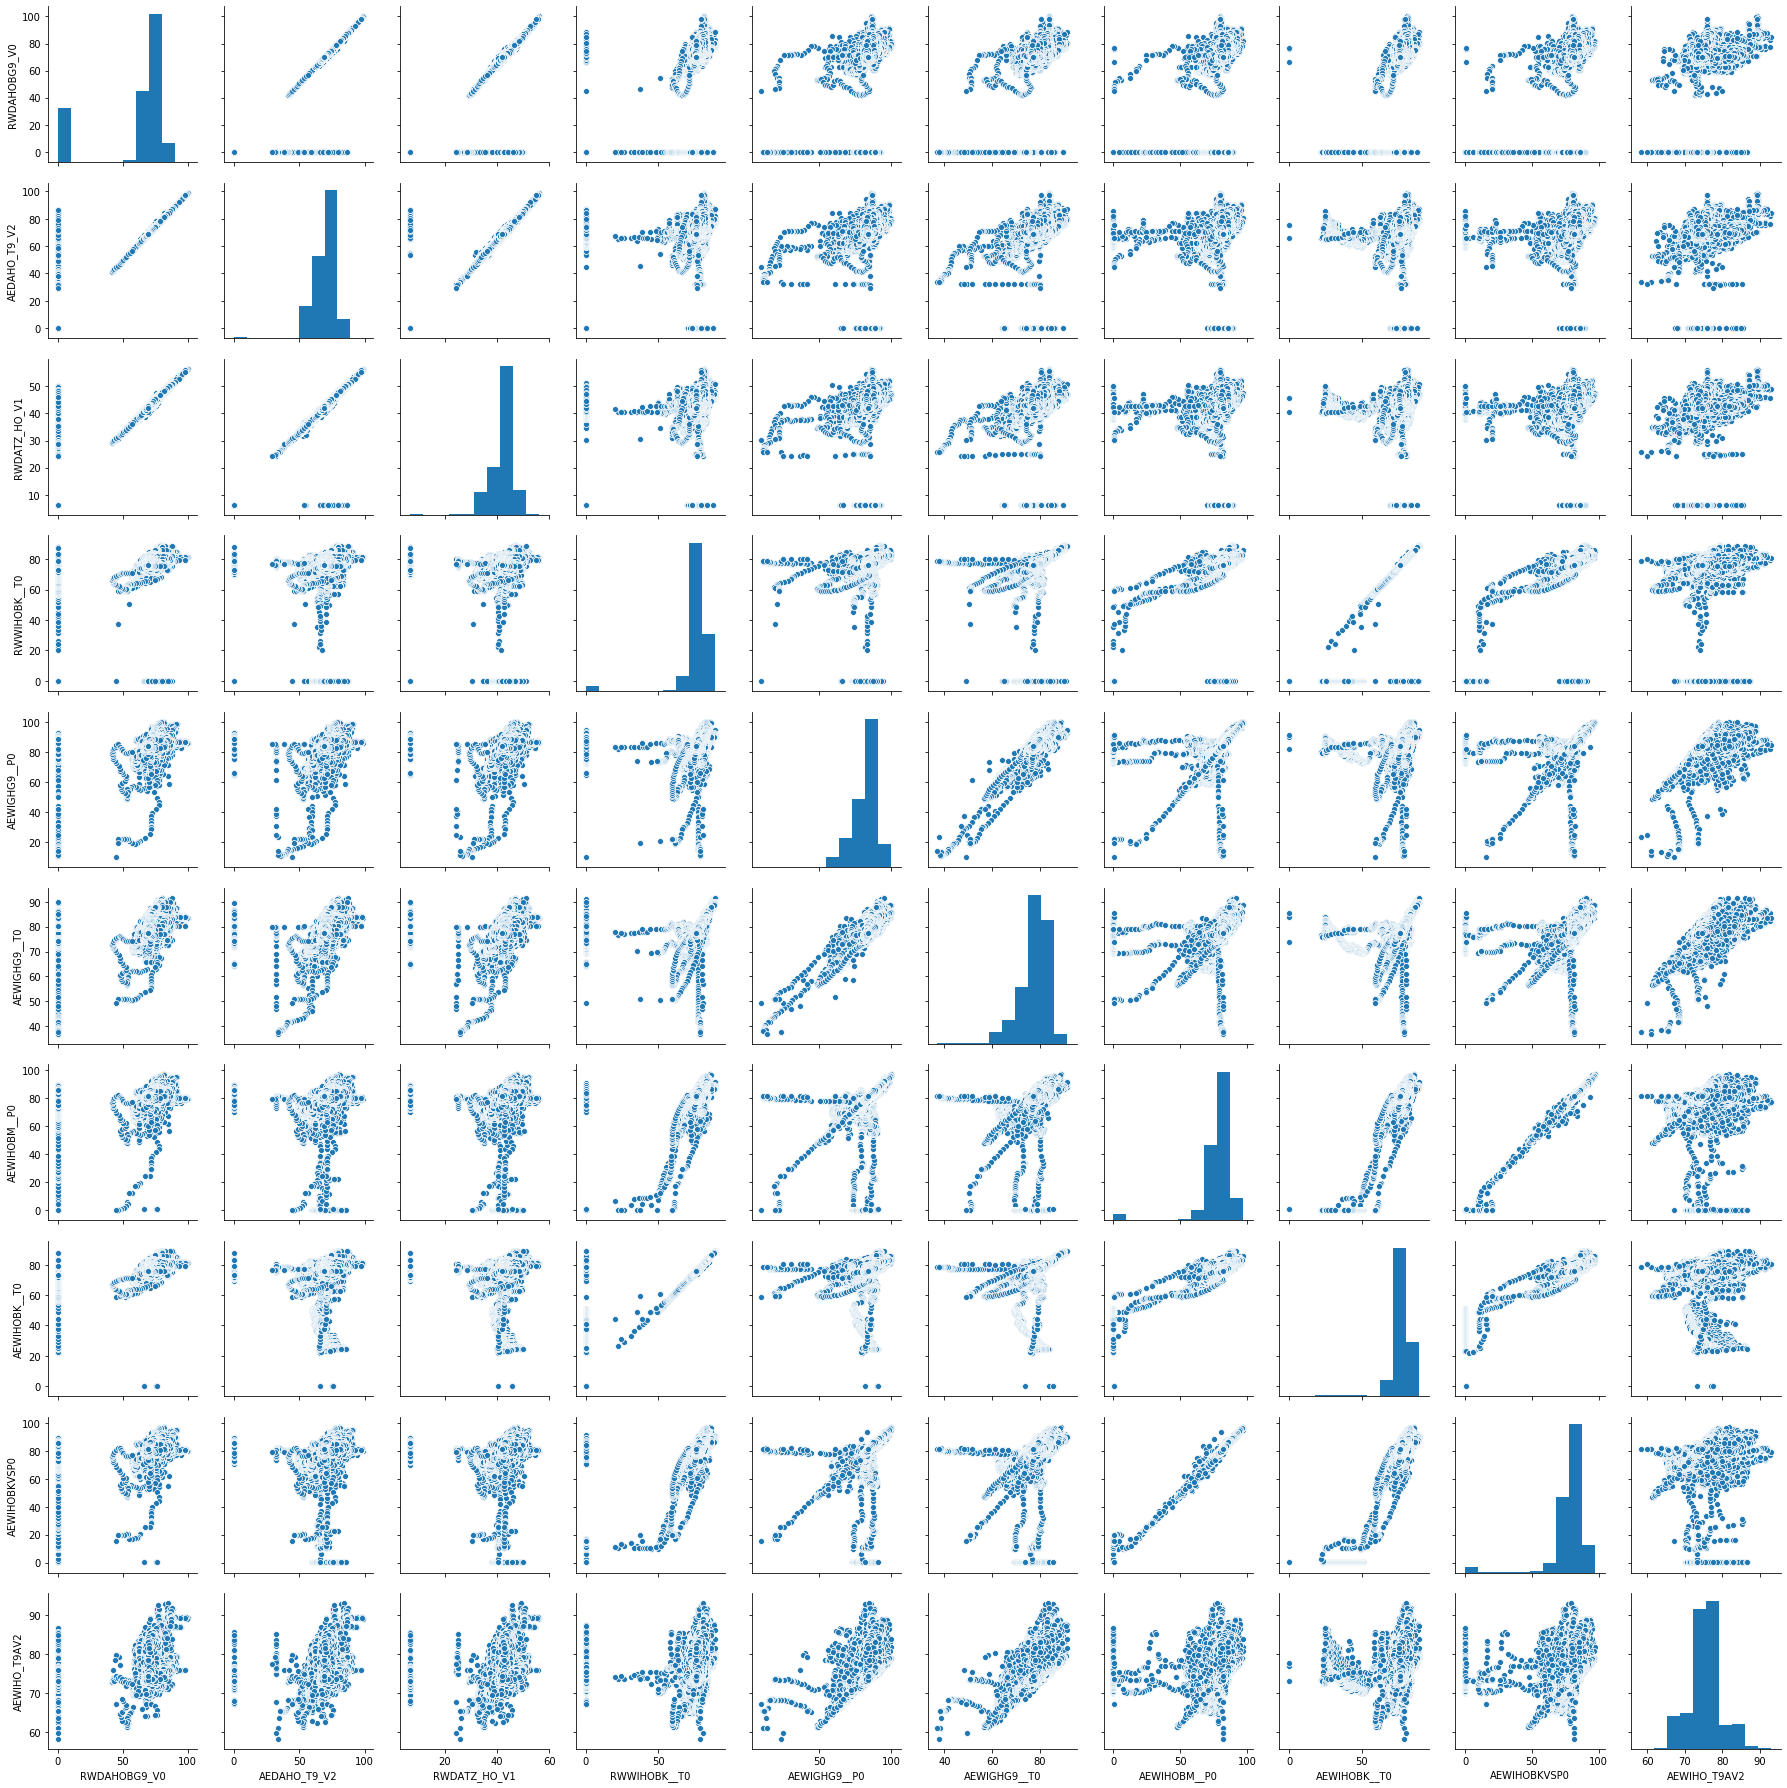

In [35]:
import seaborn as sns
sns.pairplot(dataframe_high_correlation_spearman)
plt.savefig('updated_spearman_correlation_plot.png')

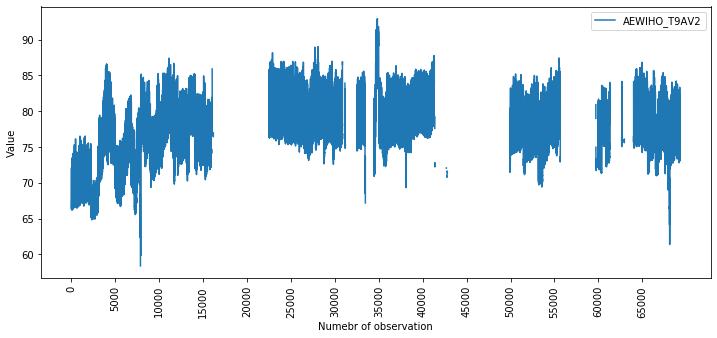

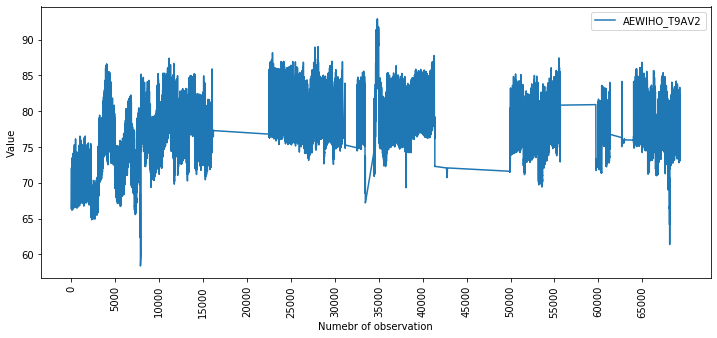

In [31]:
dataframe_resample = dataframe_high_correlation.resample('1min').mean()
dataframe_resample_copy = dataframe_resample.copy()
dataframe_resample_copy = dataframe_resample_copy.reset_index()

dataframe_interpolate = dataframe_resample.interpolate('linear')
dataframe_interpolate_copy = dataframe_interpolate.copy()
dataframe_interpolate_copy = dataframe_interpolate_copy.reset_index()

plt.plot(dataframe_resample_copy[target_column])
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_resample_copy.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('resample.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

plt.figure()

plt.plot(dataframe_interpolate_copy[target_column])
plt.legend([target_column], loc='best')
plt.xticks(np.arange(0,dataframe_interpolate_copy.shape[0],5000),rotation='vertical')
plt.xlabel('Numebr of observation')
plt.ylabel('Value')
# plt.savefig('resample.png',bbox_inches='tight')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (12, 5)

In [52]:
# print(dataframe_high_correlation.shape)
# dataframe_high_correlation.describe()
# dataframe_high_correlation.describe()['RWWIHOBG9_V0']['std']

In [61]:
# # take column who has STD within 20
# a=[]
# for i in dataframe_high_correlation.columns:
#     if dataframe_high_correlation.describe()[i]['std']<=25:
#         a.append(i)
        
# print(a)

In [62]:
# data = dataframe_high_correlation.iloc[:][a]

In [36]:
# a = dataframe_high_correlation.loc[:,target_column]
# type(a)
# import seaborn as sns
# sns.pairplot(data, height = 2.5)

In [48]:
# dataframe_high_correlation = data

In [56]:
# dataframe_resample = dataframe_high_correlation.resample('1min').mean()
# monthly_resampled_data = dataframe_high_correlation.AEWIHO_T9AV2.resample('1min').pad()
# dataframe_resample_copy = dataframe_resample.copy()
# dataframe_resample_copy = dataframe_resample_copy.reset_index()

In [33]:
print('resampled datashape: ',dataframe_resample.shape)
print('interploate datashape: ', dataframe_interpolate.shape)
print('pearson correlation datashape: ',dataframe_high_correlation.shape)
# print('spearman correlation datashape: ',dataframe_high_correlation_spearman.shape)
# print(monthly_resampled_data.shape)
# print(type(monthly_resampled_data))

resampled datashape:  (69303, 4)
interploate datashape:  (69303, 4)
pearson correlation datashape:  (43953, 4)


In [57]:
# def inter_pol(df):
#     # loop through all the columns
#     for i, column in enumerate ( df.columns ):
    
#         # find the last row with value not zero
#         x = df [ df[column] != 0 ].index [ -1 ]
#         print(x)
#         # get the last value before the zero values
#         y = df[column] [x]
#         # find and fill the rows greater than date "x" with value "y"
#         mask = (df.index > x)
#         df[column] [ mask ] = y
#         return df
        
# ds_high = inter_pol(dataframe_high_correlation)
# print(ds_high.shape)


In [58]:
# # plt.plot(monthly_resampled_data)
# print(dataframe_no_string.shape)
# print(dataframe_datetime.shape)
# plt.plot(dataframe_no_string[target_column])
# plt.figure()
# plt.plot(dataframe_datetime[target_column])

In [59]:
# print(dataframe_resample_copy.shape)

# plt.plot(dataframe_resample_copy[target_column], color = 'blue')
# plt.legend([target_column], loc='best')
# # plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# # plt.xticks(rotation = 'vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.xlim(dataframe_resample_copy.index[0],dataframe_resample_copy.index[-1])
# plt.xticks(np.arange(0,dataframe_resample_copy.shape[0],5000),rotation='vertical')
# # plt.savefig('resample.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [60]:
# dataframe_interpolate = dataframe_resample.interpolate('linear')
# dataframe_interpolate_copy = dataframe_interpolate.copy()
# dataframe_interpolate_copy = dataframe_interpolate_copy.reset_index()

In [61]:
# print(dataframe_interpolate_copy.shape)
# plt.plot(dataframe_interpolate_copy[target_column], color = 'blue')
# plt.legend([target_column], loc='best')
# # plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# # plt.xticks(rotation = 'vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.xlim(dataframe_interpolate.index[0],dataframe_interpolate.index[-1]+5)
# plt.xticks(np.arange(0,dataframe_interpolate_copy.shape[0],5000),rotation = 'vertical')
# # plt.savefig('interpolation.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [62]:
# b = 0
# for i in dataframe_resample.index:
#     a = i
#     if a == b:
#         print(i)
#     b = a

In [63]:
# c = [1,2,3,4,5,6,10,-5,5]

# b = 0
# for i in c:
#     a = i
#     if a == b:
#         print(i)
#     b = a

In [64]:
# print(dataframe_resample.index.duplicated(keep='first'))

# df_2 = dataframe_resample.groupby(dataframe_resample.index).first()

In [65]:
# df_int_1 = dataframe_resample.interpolate(method='spline', order=1)
# print(df_int_1.shape)
# df_int_1.isna().sum()

In [66]:
# plt.plot(df_int_1[target_column])

In [67]:
# df_int_2 = dataframe_resample.ffill(axis = 0)

In [68]:
# plt.plot(df_int_2[target_column])

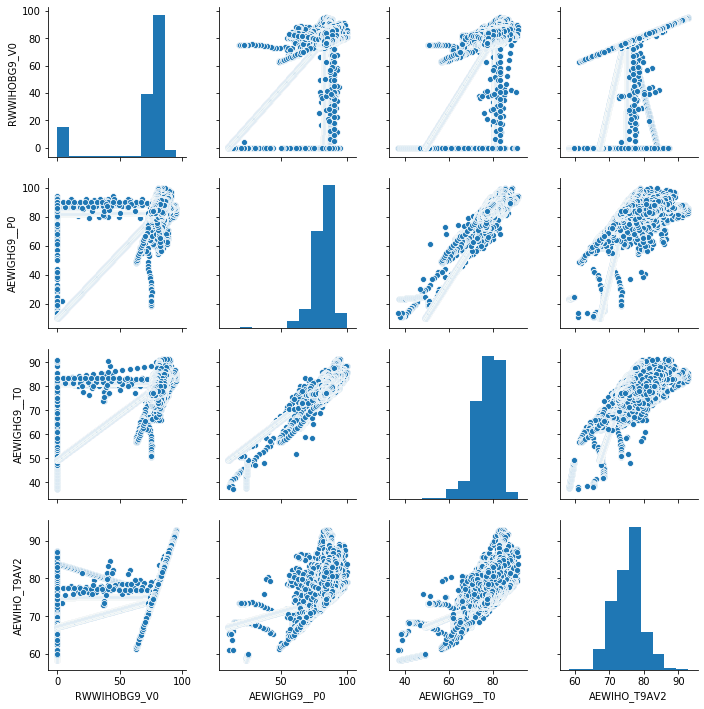

In [98]:
import seaborn as sns
sns.pairplot(dataframe_interpolate_copy, height = 2.5)
# plt.savefig('pearson_corr.jpg')

In [ ]:
# dataframe_interpolate_poly = dataframe_resample.interpolate('time')

In [ ]:
# print(dataframe_interpolate_poly.shape)
# plt.plot(dataframe_interpolate_poly[target_column], color = 'blue')
# plt.legend([target_column], loc='best')
# # plt.xticks(np.arange(dataframe_resample.index[0],dataframe_resample.index[-1]),rotation='vertical')
# # plt.xticks(rotation = 'vertical')
# plt.xlabel('Numebr of observation')
# plt.ylabel('Value')
# # plt.xlim(dataframe_interpolate.index[0],dataframe_interpolate.index[-1]+5)
# # plt.xticks(np.arange(0,dataframe_interpolate_poly.shape[0],5000),rotation = 'vertical')
# # plt.savefig('interpolation.png',bbox_inches='tight')
# plt.rcParams['figure.figsize'] = (12, 5)

In [ ]:
# multivariate_column_label = ['AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.94


In [ ]:
# for i in dataframe_high_correlation:
#     plt.plot(dataframe_high_correlation[i])
#     plt.title(str(i))
#     plt.show()
    
    
#     # plt.plot(dataframe_high_correlation['AEWIHOBKF_V0'])

In [ ]:
# dataframe_high_correlation_1 = dataframe_high_correlation.drop(['AEWIHOBKF_V0'], axis=1)
# print(dataframe_high_correlation_1.shape)
# plt.plot(dataframe_datetime['DEDAHGGHSZG1'], color = 'blue')

In [ ]:
# current_directory = os.getcwd()
# print('current_directory is: ',current_directory)
# address = 'image_folder'
# final_directory = current_directory+'/'+str(address)
# if not os.path.exists(final_directory):
#     os.makedirs(final_directory)
#     print('created : ', final_directory)
# else:
#     print(' has already created',final_directory)
#     pass

In [100]:
dataframe_interpolate.shape

(69303, 4)

In [ ]:
from dataset_analysis import draw_feature_vs_target
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'+'_'+str(today)
draw_feature_vs_target = draw_feature_vs_target(dataframe_interpolate,final_directory,subfolder_1)

In [43]:
# def make_dataset(dataframe, required_number_of_test_data):
#     dataset = np.array(dataframe)
    
#     go_for_training = int(len(dataset)-required_number_of_test_data)
#     print('go_for_training: ', go_for_training)
#     print('required_number_of_test_data: ', required_number_of_test_data)
#     percentage = go_for_training/int(len(dataset))
#     print('percentage: ',percentage)
    
#     NumberOfElements = int(len(dataset) * percentage)
#     print('Number of Elements for training: ', NumberOfElements)
#     print('dataset length: ', len(dataset))

#     train_input = dataset[0:NumberOfElements, 0:-1]
#     print('train_input shape: ', train_input.shape)
#     train_output = dataset[0:NumberOfElements, -1]
#     print('train_output shape: ', train_output.shape)

#     test_input = dataset[NumberOfElements:len(dataset), 0:-1]
#     test_output = dataset[NumberOfElements:len(dataset), -1]
    

# #     test_input = test_input[500:560]
# #     test_output = test_output[500:560]
#     print('test_input shape: ', test_input.shape)
#     print('test_output shape: ', test_output.shape)

#     return train_input, train_output, test_input, test_output

In [35]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_interpolate,required_number_of_test_data)

model_list = [LinearRegression(fit_intercept=True),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

go_for_training:  69103
required_number_of_test_data:  200
percentage:  0.9971141220437788
Number of Elements for training:  69103
dataset length:  69303
train_input shape:  (69103, 3)
train_output shape:  (69103,)
test_input shape:  (200, 3)
test_output shape:  (200,)


------- LinearRegression
<class 'numpy.ndarray'>
r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.70
RMSE:  2.387227972407205
!!!!---------------!!!!----------------!!!!
------- Lasso
<class 'numpy.ndarray'>
r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.71
RMSE:  2.390230256568906
!!!!---------------!!!!----------------!!!!
------- Ridge
<class 'numpy.ndarray'>
r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.70
RMSE:  2.3872281145143406
!!!!---------------!!!!----------------!!!!
------- BayesianRidge
<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:201: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


r_2 statistic: 0.13
Mean_absolute_error: 2.01
Mean squared error: 5.70
RMSE:  2.3873013742667477
!!!!---------------!!!!----------------!!!!
------- tree


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figur

r_2 statistic: 0.83
Mean_absolute_error: 0.92
Mean squared error: 1.10
RMSE:  1.0507933197440602
!!!!---------------!!!!----------------!!!!
------- ExtraTreesRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see 

<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:201: RuntimeWarning: More than 20 figures have been opened. Figur

r_2 statistic: 1.00
Mean_absolute_error: 0.02
Mean squared error: 0.00
RMSE:  0.04360168992357175
!!!!---------------!!!!----------------!!!!
------- BaggingRegressor


/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/atif/iai_ml_venv/lib/python3.6/site-pa

<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:201: RuntimeWarning: More than 20 figures have been opened. Figur

r_2 statistic: 1.00
Mean_absolute_error: 0.02
Mean squared error: 0.00
RMSE:  0.044051205484547294
!!!!---------------!!!!----------------!!!!
------- GBR


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:154: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<class 'numpy.ndarray'>


/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/data_analysis_and_forecasting/model_file.py:201: RuntimeWarning: More than 20 figures have been opened. Figur

r_2 statistic: 0.99
Mean_absolute_error: 0.15
Mean squared error: 0.04
RMSE:  0.21132921403503743
!!!!---------------!!!!----------------!!!!


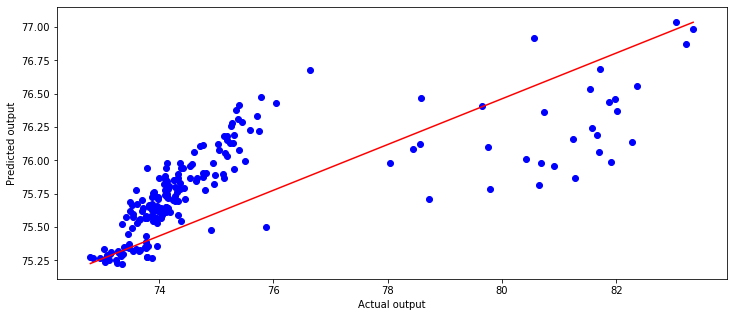

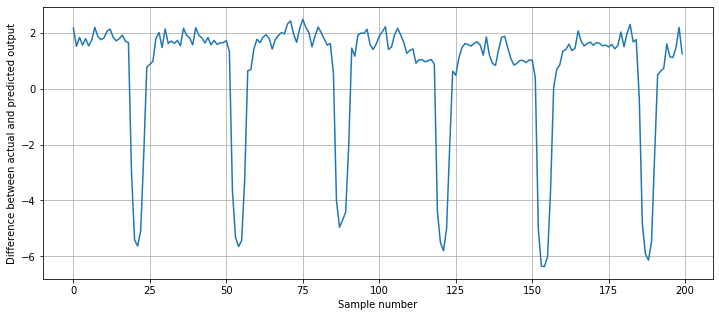

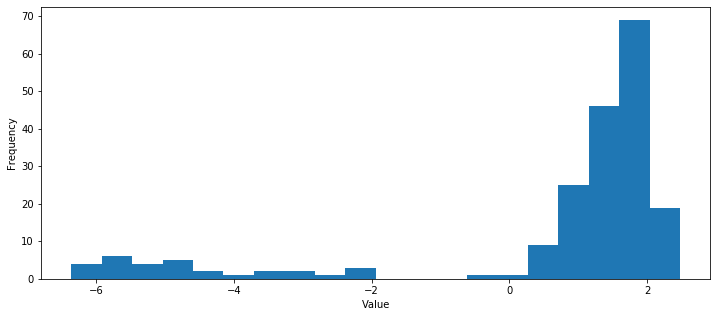

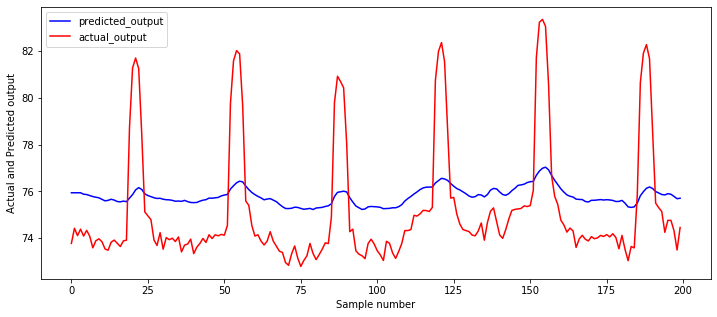

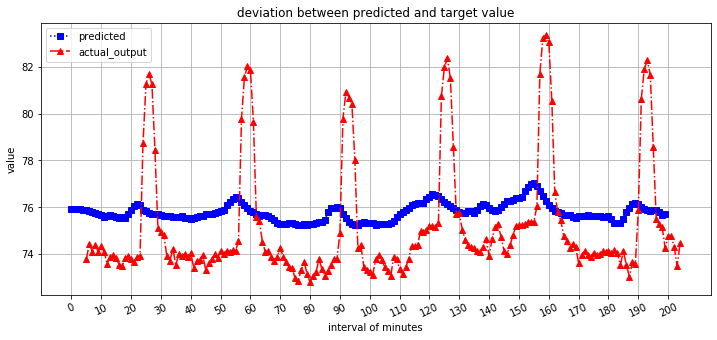

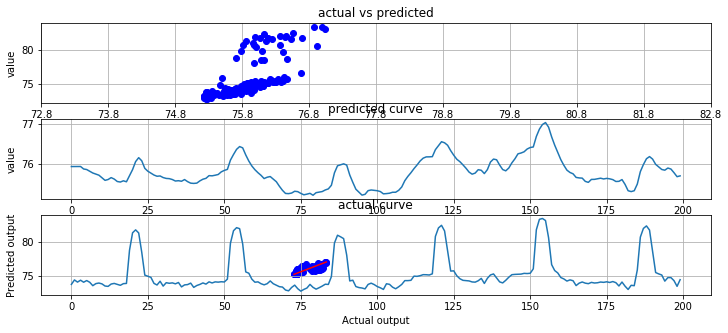

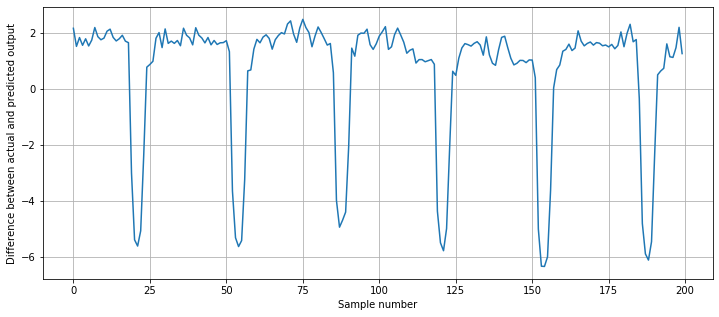

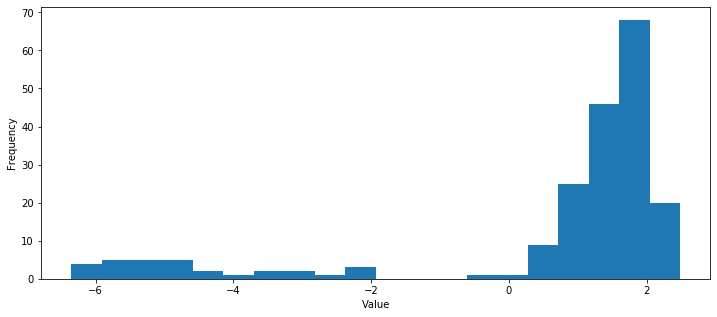

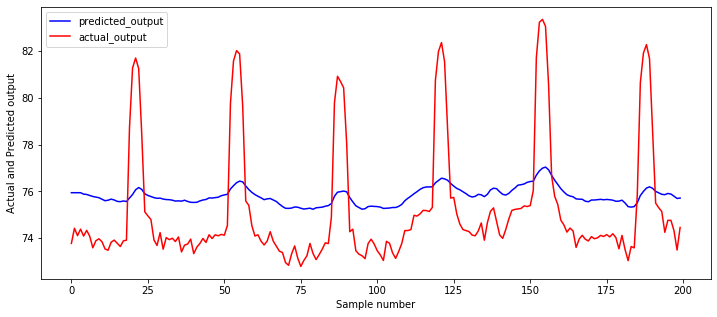

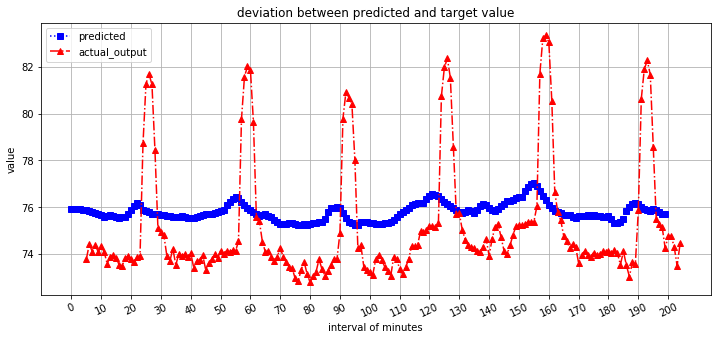

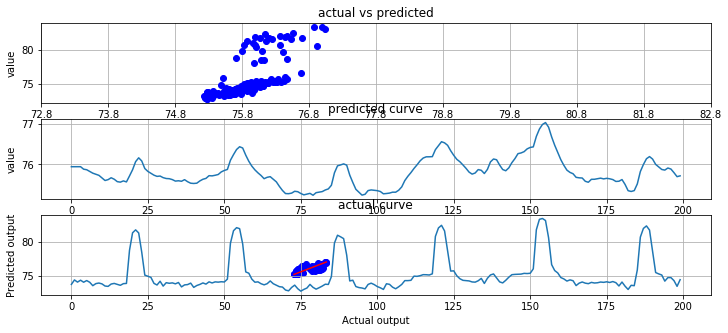

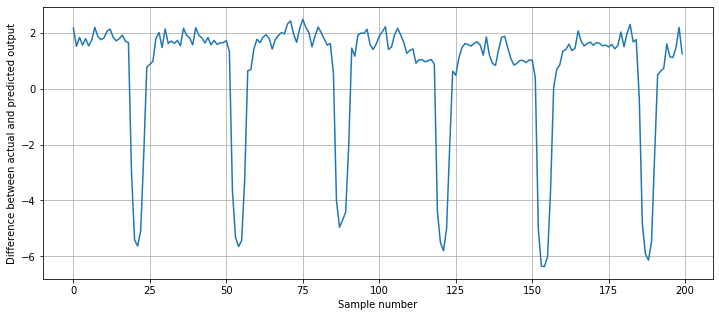

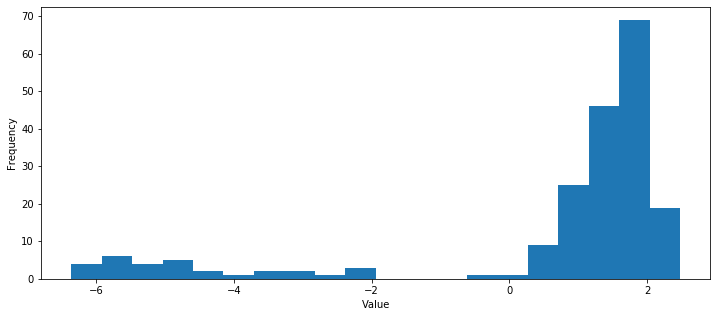

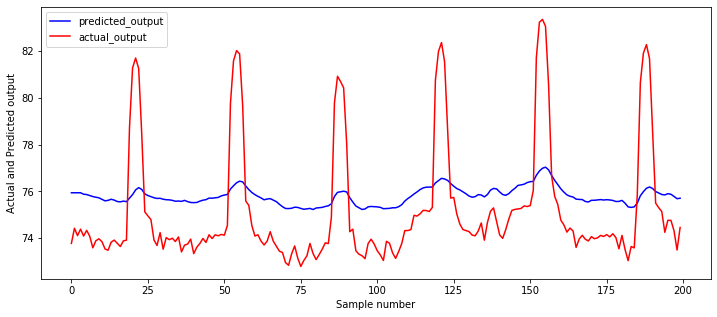

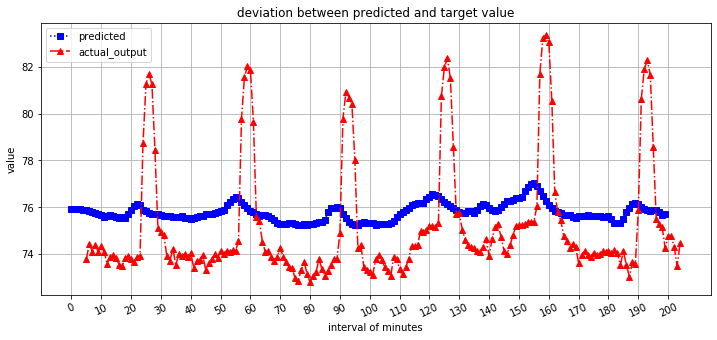

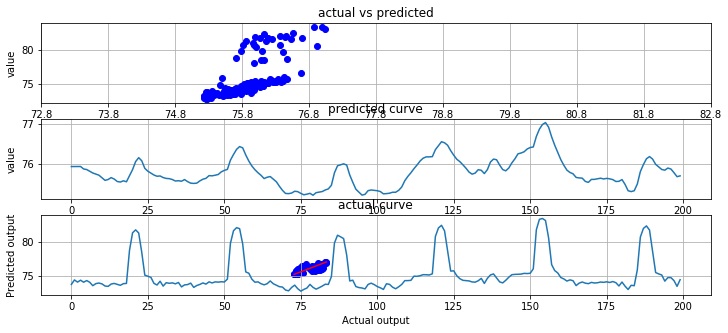

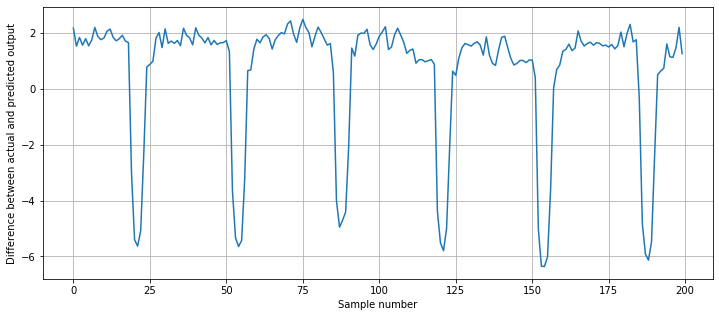

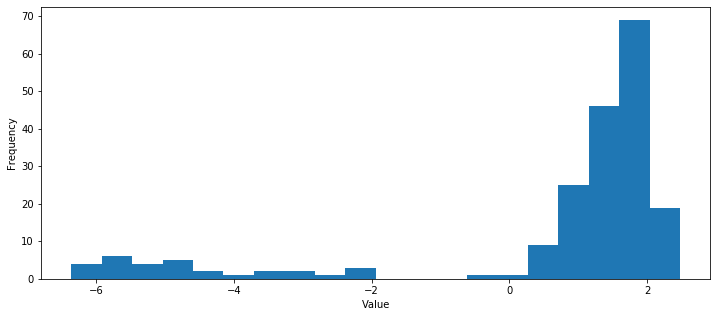

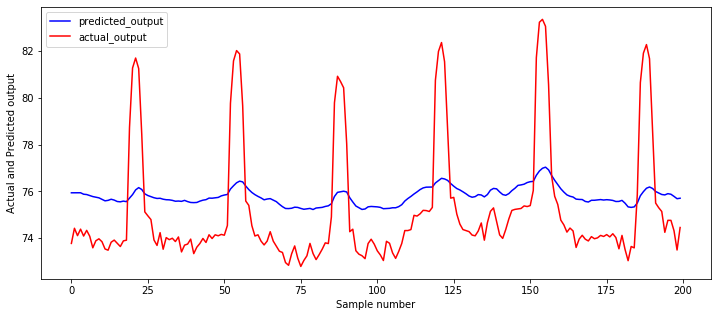

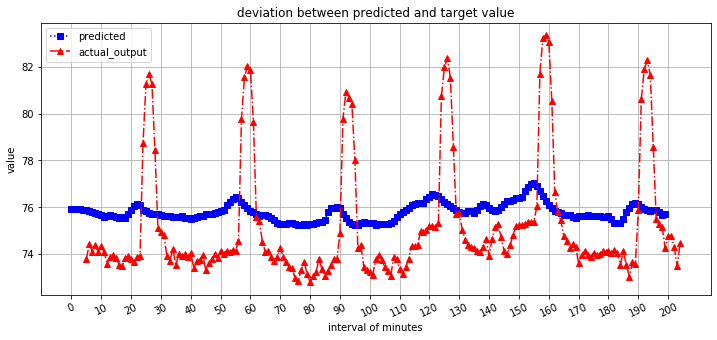

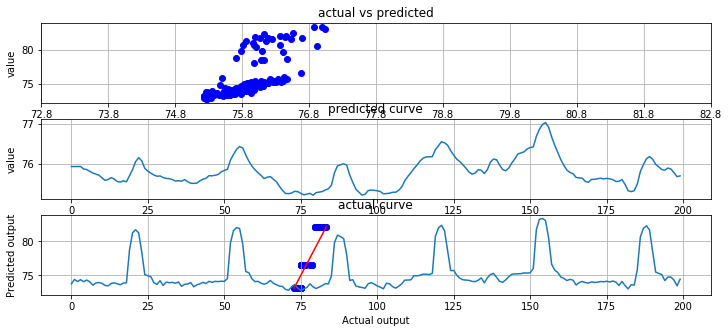

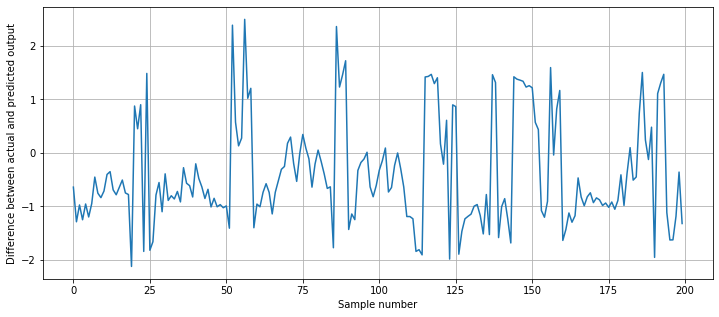

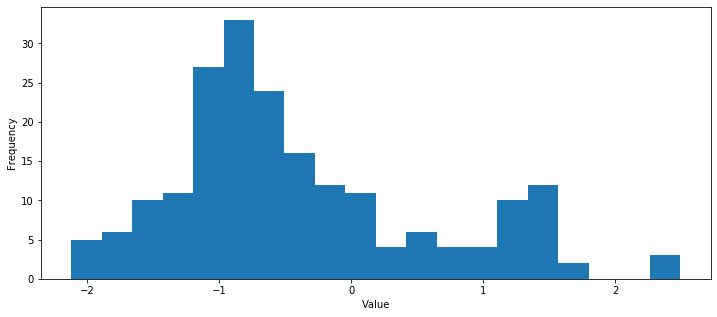

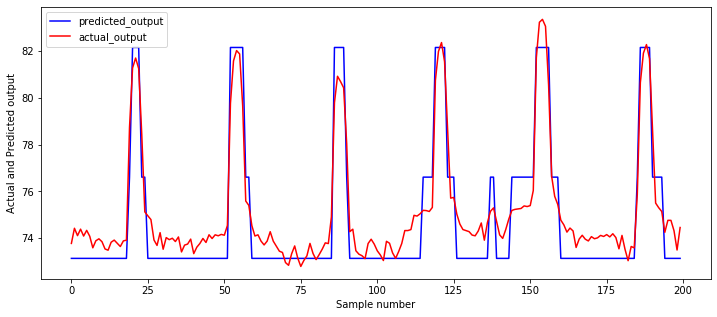

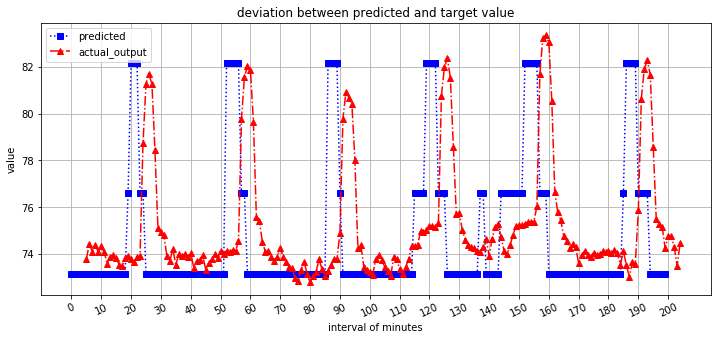

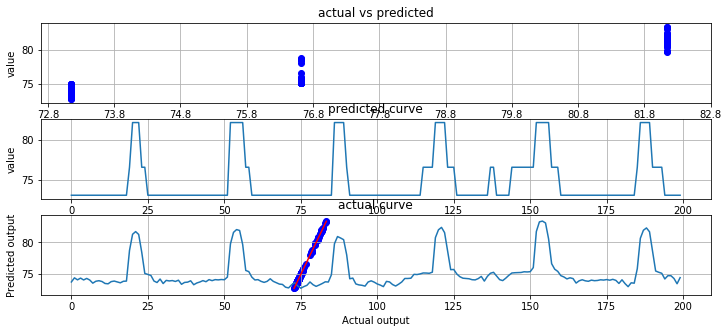

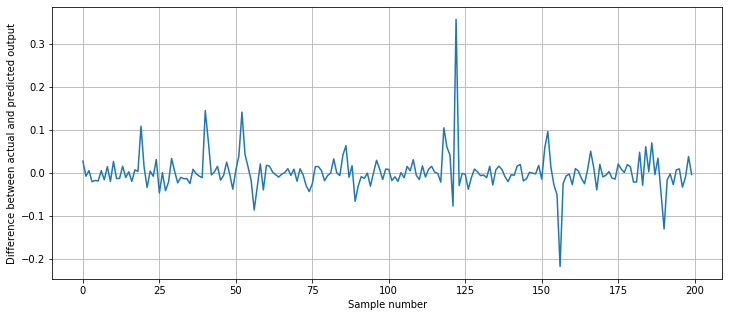

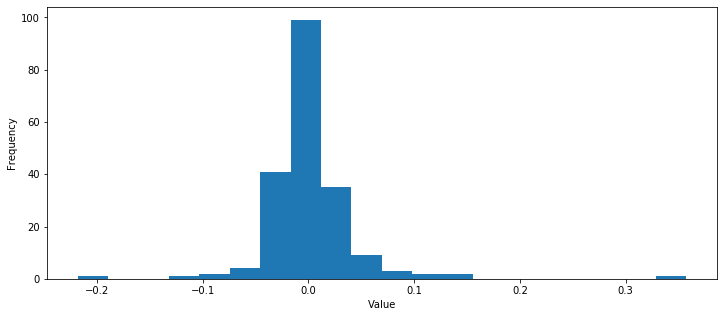

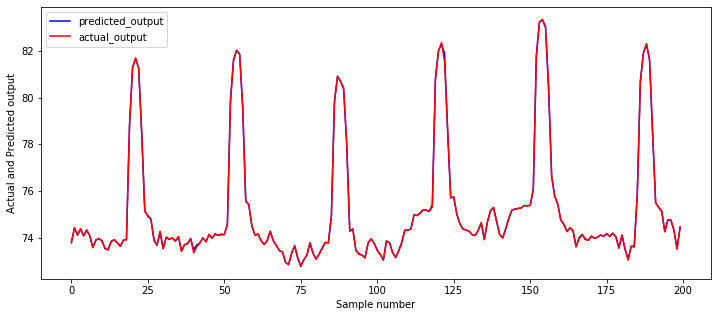

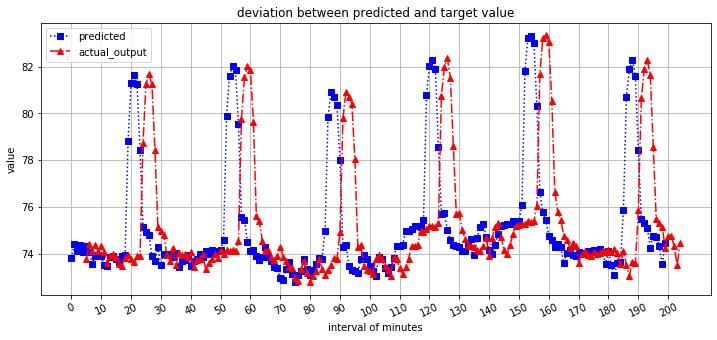

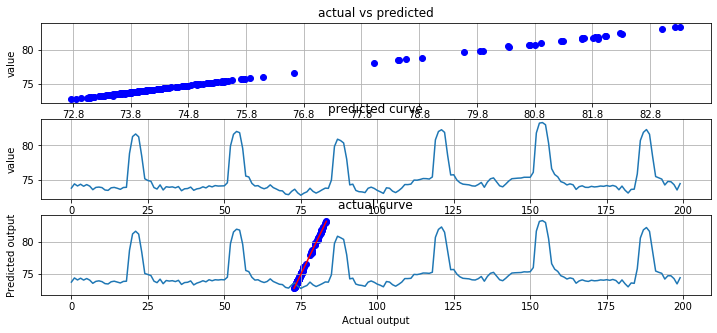

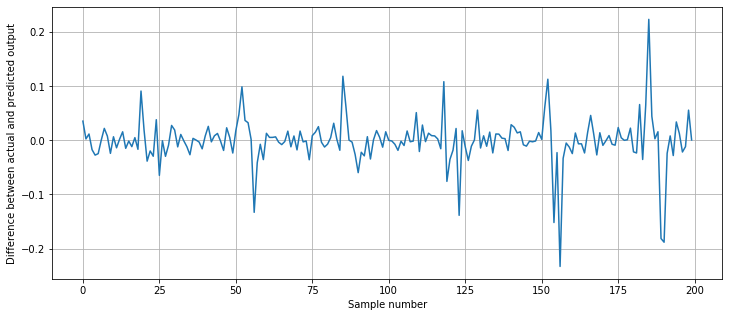

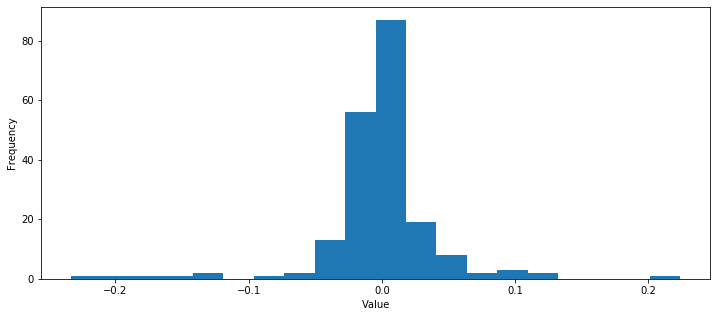

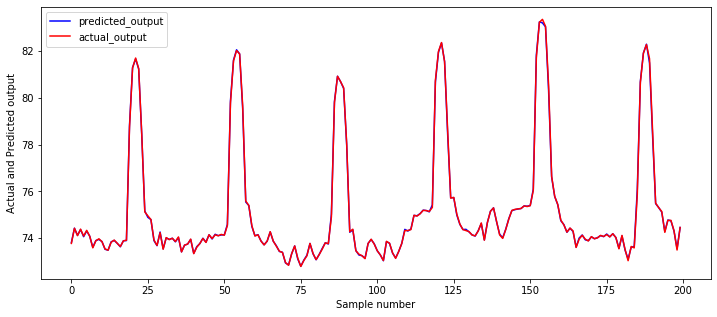

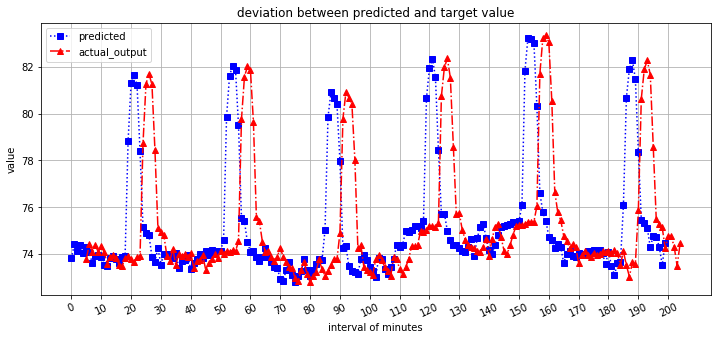

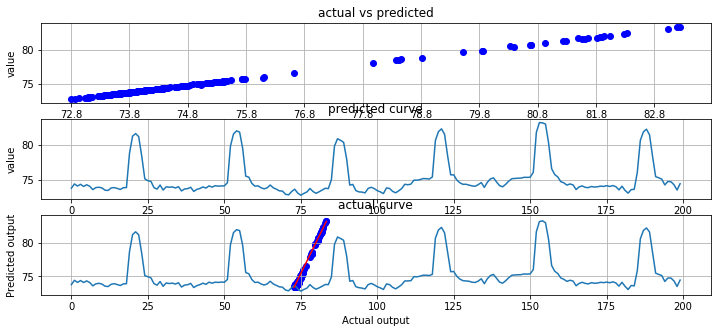

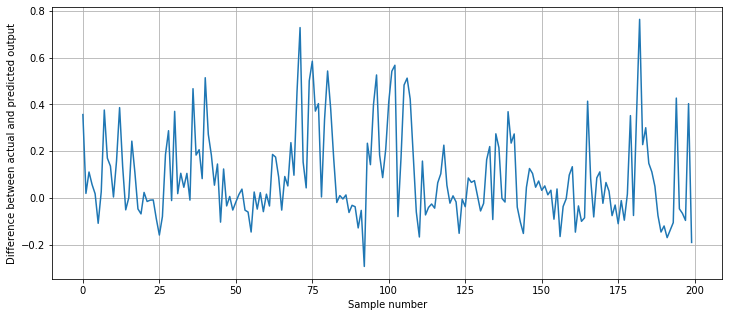

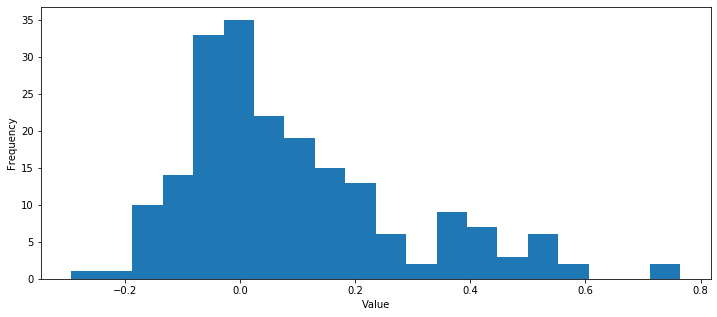

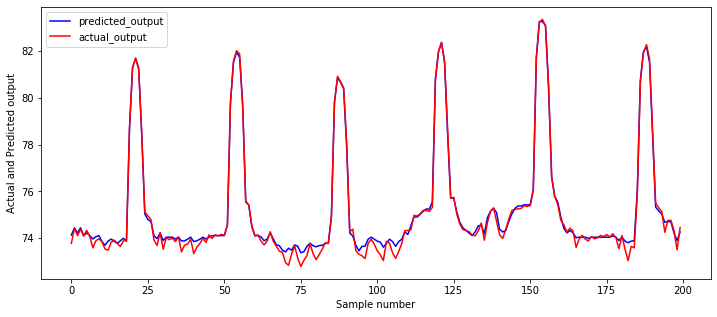

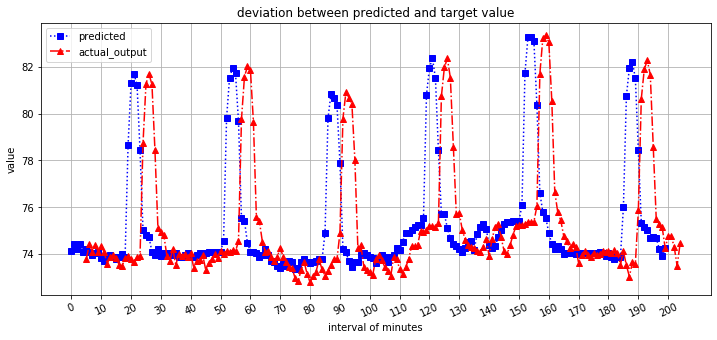

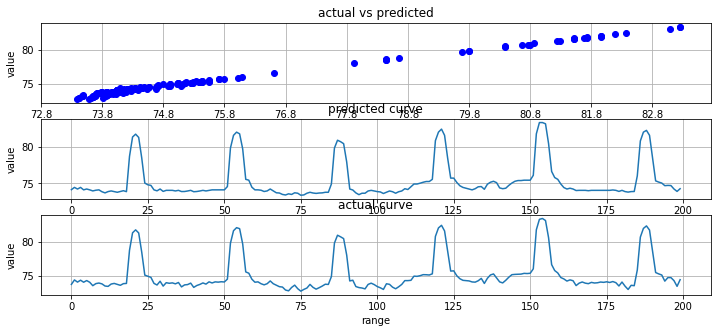

In [36]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output,
                           final_directory, evaluation_metrics_file_path)

In [42]:
# rowData = dataframe_datetime.loc[ '2019-08-16 11:20:00' :, : ]
# print(type(rowData))
# print(rowData.shape)
# rowData.head(3)

dataframe_high_correlation.tail()

RWWIHOBG9_V0  AEWIGHG9__P0  AEWIGHG9__T0  AEWIHO_T9AV2
dateTime                                                                   
2019-03-31 23:55:00     76.618492     85.093645     77.858005     74.766040
2019-03-31 23:56:00     76.590632     84.642071     77.822379     74.764187
2019-03-31 23:57:00     76.146138     84.233563     77.617737     74.324228
2019-03-31 23:58:00     75.337882     84.094021     77.408532     73.498997
2019-03-31 23:59:00     76.299368     83.961302     77.354675     74.459244

In [43]:
df = dataframe_date_time_type(dataframe_high_correlation)
# df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, target_column,final_directory, subfolder_name = '3_date_fig_target')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, target_column,final_directory, subfolder_name = '3_week_fig_target')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, target_column,final_directory, subfolder_name = '3_day_fig_target')

NameError: name 'dataframe_date_time_type' is not defined

In [ ]:
# train_ip_reg = train_input[0:500,:]
# train_op_reg = train_output[0:500]

# test_ip_reg = test_input[0:10,:]
# test_op_reg = test_output[0:10]

# print(train_ip_reg.shape)
# print(train_op_reg.shape)

# print('#'*10)

# print(test_ip_reg.shape)
# print(test_op_reg.shape)

In [185]:
from sklearn import *
import sklearn
from joblib import dump, load

In [186]:
my_model = BaggingRegressor(ExtraTreesRegressor())
# my_model = sklearn.linear_model.LinearRegression(fit_intercept=True)
# my_model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
# my_model = ExtraTreesRegressor()
my_model.fit(train_input, train_output)
print('score: ',my_model.score(train_input, train_output))

# file_name = 'saved_scikit_model_decision_tree.joblib'

# dump(my_model, file_name)
# clf = load(file_name)

score:  0.999996366855406


In [188]:
my_pred = my_model.predict(test_input)
# my_pred = clf.predict(test_input)

<Figure size 864x360 with 0 Axes>

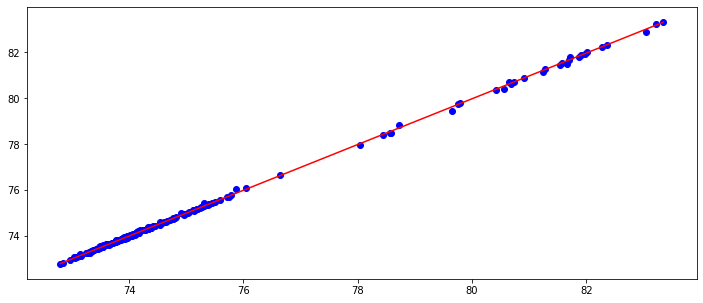

<Figure size 864x360 with 0 Axes>

In [189]:
plt.plot((min(test_output), max(test_output)), (min(my_pred), max(my_pred)), color='red')
plt.scatter(test_output, my_pred, color='blue')

plt.figure()

# difference = test_output-my_pred
# plt.plot(difference)

# plt.plot((min(test_op_reg), max(test_op_reg)), (min(my_pred), max(my_pred)), color='red')
# plt.scatter(test_op_reg, my_pred, color='blue')

In [190]:
test_op_reg = test_output
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_op_reg,my_pred))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_op_reg,my_pred))
print("Mean squared error: %.2f" % mean_squared_error(test_op_reg,my_pred))
RMSE=math.sqrt(mean_squared_error(test_op_reg,my_pred))
print('RMSE: ',RMSE)

r_2 statistic: 1.00
Mean_absolute_error: 0.03
Mean squared error: 0.00
RMSE:  0.041838599241741964


In [ ]:
import graphviz 
dot_data = tree.export_graphviz(my_model, out_file='mytree_1.dot',feature_names =['f1','f2','f3'])

In [ ]:
from sklearn import tree  
import pydotplus

try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

dotfile = StringIO()
tree.export_graphviz(my_model, out_file=dot_data.dot)
# graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
(graph,)=pydot.graph_from_dot_data(dotfile.getvalue())

graph.write_png("dtree.png")

In [ ]:
tree.export_graphviz(my_model, out_file='newtree.dot') #produces dot file

import pydot
dotfile = StringIO()
tree.export_graphviz(my_model, out_file=dotfile)
pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(my_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# scikit learn Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(my_model,train_input,train_output, cv=10
                                                              ,scoring = 'neg_mean_squared_error')

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


import pandas as pd
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
# print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
# print('\n', '-' * 20) # separator
# print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

print('train_size: ', train_sizes)

In [ ]:
validation_scores_mean.max()

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(train_scores_mean.min()-5,validation_scores_mean.max()+5)
plt.savefig('learning_curve_BaggingRegressor.png',bbox_inches='tight')
plt.show()

# Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [39]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

print(train_input.shape)
epochs = 30

(69103, 3)


In [40]:
# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='glorot_uniform',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='glorot_uniform',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='glorot_uniform',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='glorot_uniform',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.compile(optimizer='adam', loss='mse',metrics=['mse','accuracy'])
NN_model.summary()

W0210 00:08:14.236988 139729803282240 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:64: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0210 00:08:14.252184 139729803282240 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:497: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0210 00:08:14.254841 139729803282240 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3636: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0210 00:08:14.298864 139729803282240 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [41]:
train_model_NN = NN_model.fit(train_input, train_output, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.2,shuffle=True,
                            callbacks=[LearningRateScheduler(lr_schedule)])

W0210 00:08:15.712048 139729803282240 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0210 00:08:15.721608 139729803282240 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0210 00:08:15.776785 139729803282240 deprecation_wrapper.py:119] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:945: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 55282 samples, validate on 13821 samples
Epoch 1/30
55282/55282 [==============================] - 7s 120us/step - loss: 33.6144 - mean_squared_error: 33.6144 - acc: 0.0000e+00 - val_loss: 0.5293 - val_mean_squared_error: 0.5293 - val_acc: 0.0000e+00
Epoch 2/30
55282/55282 [==============================] - 7s 125us/step - loss: 4.5379 - mean_squared_error: 4.5379 - acc: 0.0000e+00 - val_loss: 21.5882 - val_mean_squared_error: 21.5882 - val_acc: 0.0000e+00
Epoch 3/30
55282/55282 [==============================] - 7s 118us/step - loss: 3.7222 - mean_squared_error: 3.7222 - acc: 0.0000e+00 - val_loss: 3.0892 - val_mean_squared_error: 3.0892 - val_acc: 0.0000e+00
Epoch 4/30
55282/55282 [==============================] - 7s 118us/step - loss: 2.8819 - mean_squared_error: 2.8819 - acc: 0.0000e+00 - val_loss: 0.7916 - val_mean_squared_error: 0.7916 - val_acc: 0.0000e+00
Epoch 5/30
55282/55282 [==============================] - 7s 125us/step - loss: 2.3892 - mean_squared_error: 2.389

In [42]:
print(train_model_NN.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_acc', 'loss', 'mean_squared_error', 'acc'])


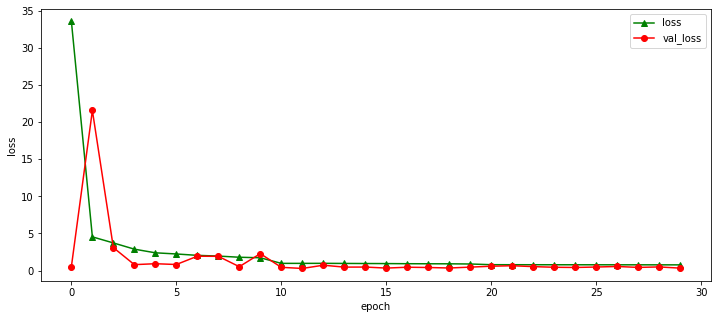

In [71]:
# summarize history for accuracy
plt.plot(train_model_NN.history['loss'],'-^', color = 'green')
plt.plot(train_model_NN.history['val_loss'],'-o', color = 'red')

# plt.plot(train_model_NN.history['mean_squared_error'],'-^', color = 'green')
# plt.plot(train_model_NN.history['val_mean_squared_error'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
plt.savefig('Neural_Network_loss_vs_epoch_shuffle_True.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [44]:
NN_model.save("NN_model.h5")
from keras.models import load_model
load_trained_NN=load_model("NN_model.h5")

In [45]:
# predicted_output_NN = NN_model.predict(test_input)
predicted_output_NN = load_trained_NN.predict(test_input)

In [46]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output_NN))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output_NN))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output_NN))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output_NN))
print('RMSE: ',RMSE)

r_2 statistic: 0.99
Mean_absolute_error: 0.19
Mean squared error: 0.05
RMSE:  0.22403321591390324


In [47]:
test_output_NN = np.reshape(test_output,(-1,1))
test_output_NN.shape

(200, 1)

<class 'numpy.ndarray'>


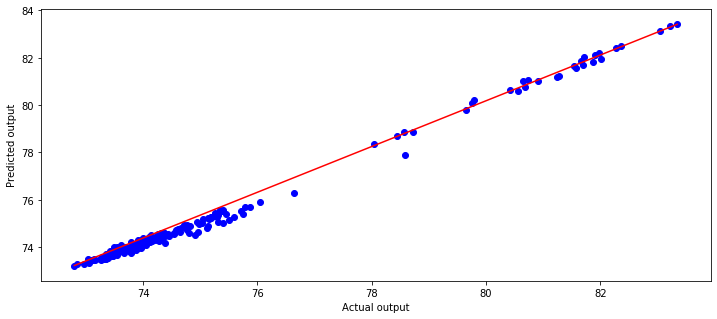

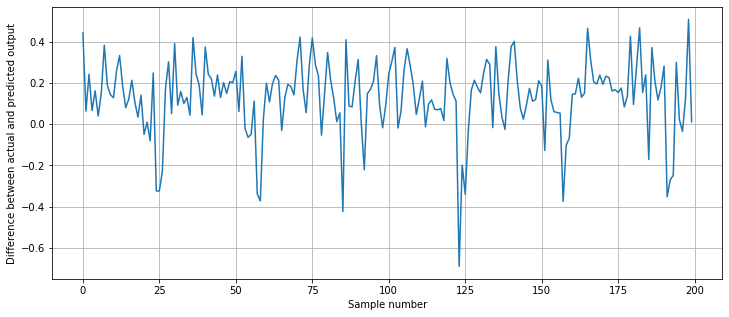

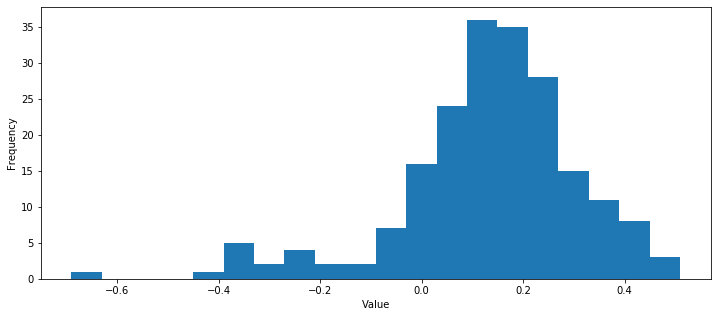

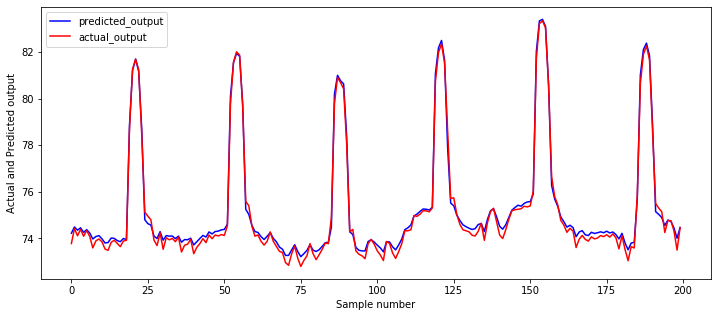

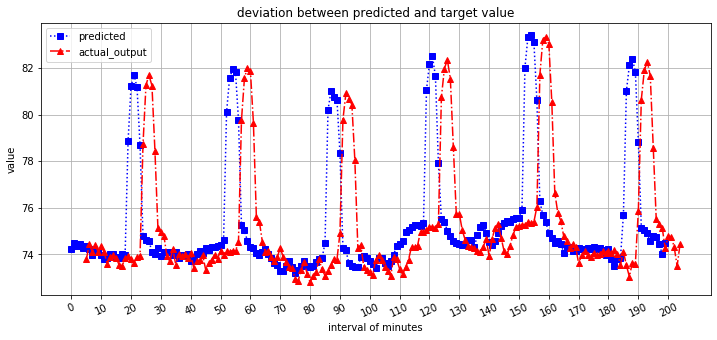

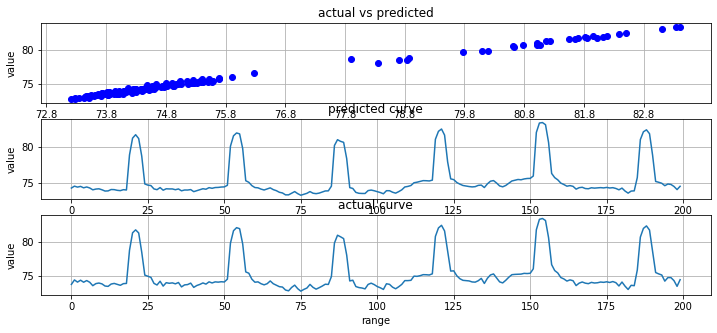

In [48]:
plot_graph(test_output_NN, predicted_output_NN, final_directory,'Neural_Network')

In [49]:
evaluation_metrices(test_output_NN,predicted_output_NN,final_directory,'Neural Netowrk', evaluation_metrics_file_path)

r_2 statistic: 0.99
Mean_absolute_error: 0.19
Mean squared error: 0.05
RMSE:  0.22403321591390324
!!!!---------------!!!!----------------!!!!


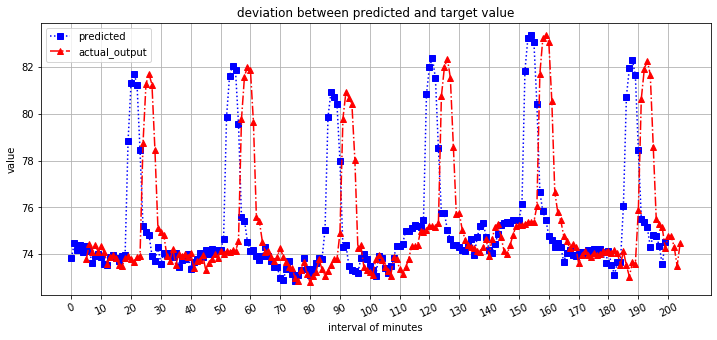

In [118]:

# shifting actual graph 5 unit in the direction of right to observe the trend of predicted curve

actual_data = range(205)

yhat = predicted_output_NN
y_Conv_Lstm_test = test_output_NN

plt.plot(yhat[0:200],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:],y_Conv_Lstm_test[0:200],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,205,10))
plt.xticks( rotation=25)
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [119]:
print('test op NN shape: ', test_output_NN.shape,'len of test op NN: ',len(test_output_NN))
print('predicted op NN shape: ', predicted_output_NN.shape,'len predicted op NN: ',len(predicted_output_NN))

test op NN shape:  (200, 1) len of test op NN:  200
predicted op NN shape:  (200, 1) len predicted op NN:  200


# LSTM

In [54]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [55]:
multiple_ip_train_data, multiple_ip_test_set = make_dataset_LSTM(dataframe_interpolate, required_number_of_test_data)

go_for_training:  69103
required_number_of_test_data:  200
percentage:  0.9971141220437788
dataset length:  69303
Number of Elements for training:  69103
LSTM train set:  (69103, 10)
LSTM test set:  (200, 10)


In [56]:
X_Conv_Lstm, y_Conv_Lstm = split_sequence(multiple_ip_train_data, number_of_step_lstm)

In [57]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('y_Conv_Lstm shape: ', y_Conv_Lstm.shape,' size: ',y_Conv_Lstm.size,' dim: ',y_Conv_Lstm.ndim)

X_Conv_Lstm shape:  (69101, 2, 9) 	X_Conv_Lstm size:  1243818 	X_Conv_Lstm dimension:  3
y_Conv_Lstm shape:  (69101,)  size:  69101  dim:  1


In [58]:
samples = X_Conv_Lstm.shape[0]
time = number_of_step_lstm
rows = 1
n_features = X_Conv_Lstm.shape[-1]
cols = n_features
channels = 1

In [59]:
# X_Conv_Lstm_train = X_Conv_Lstm.reshape((X_Conv_Lstm.shape[0], n_seq, n_rows, n_steps_2, n_features))
X_Conv_Lstm_train = X_Conv_Lstm.reshape((samples, time, rows, cols, channels)) #last 2 is feature

In [60]:
print('X_Conv_Lstm shape: ',X_Conv_Lstm.shape,'\tX_Conv_Lstm size: ',X_Conv_Lstm.size,'\tX_Conv_Lstm dimension: ',X_Conv_Lstm.ndim)
print('X_Conv_Lstm_train shape: ',X_Conv_Lstm_train.shape,'\tX_Conv_Lstm_train size: ',X_Conv_Lstm_train.size,'\tX_Conv_Lstm_train dimension: ',X_Conv_Lstm_train.ndim)

X_Conv_Lstm shape:  (69101, 2, 9) 	X_Conv_Lstm size:  1243818 	X_Conv_Lstm dimension:  3
X_Conv_Lstm_train shape:  (69101, 2, 1, 9, 1) 	X_Conv_Lstm_train size:  1243818 	X_Conv_Lstm_train dimension:  5


In [61]:
lr = 0.01

def lr_schedule(epoch):
    print('epoch value: ', epoch)
    lr_1 = lr * (0.1 ** int(epoch / 10))
    print('now lr_1: ', lr_1)
    return lr_1

batch_size = batch_size
activation_function = 'relu'

In [62]:
model = LSTM_model(activation_function, time, rows, cols, channels)

W0209 08:07:41.612220 140338293970752 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W0209 08:07:41.729200 140338293970752 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1264: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [63]:
model.compile(optimizer='adam', loss='mse',metrics=['mse','accuracy'])

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 8, 64)          33536     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 34,049
Trainable params: 34,049
Non-trainable params: 0
_________________________________________________________________


In [65]:
train_model=model.fit(X_Conv_Lstm_train, y_Conv_Lstm, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2, 
                      shuffle=True, callbacks=[LearningRateScheduler(lr_schedule)])
#                      ModelCheckpoint('E:/CONV_LSTM_30.h5', save_best_only=True)])

W0209 08:08:28.593181 140338293970752 deprecation.py:323] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55280 samples, validate on 13821 samples
epoch value:  0
now lr_1:  0.01
Epoch 1/30
55280/55280 [==============================] - 10s 185us/step - loss: 18.7073 - mean_squared_error: 18.7073 - acc: 0.0000e+00 - val_loss: 23.2920 - val_mean_squared_error: 23.2920 - val_acc: 0.0000e+00
epoch value:  1
now lr_1:  0.01
Epoch 2/30
55280/55280 [==============================] - 10s 177us/step - loss: 8.2195 - mean_squared_error: 8.2195 - acc: 0.0000e+00 - val_loss: 19.5578 - val_mean_squared_error: 19.5578 - val_acc: 0.0000e+00
epoch value:  2
now lr_1:  0.01
Epoch 3/30
55280/55280 [==============================] - 10s 177us/step - loss: 7.6817 - mean_squared_error: 7.6817 - acc: 0.0000e+00 - val_loss: 20.9502 - val_mean_squared_error: 20.9502 - val_acc: 0.0000e+00
epoch value:  3
now lr_1:  0.01
Epoch 4/30
55280/55280 [==============================] - 10s 178us/step - loss: 7.4091 - mean_squared_error: 7.4091 - acc: 0.0000e+00 - val_loss: 17.8833 - val_mean_squared_error: 17.883

dict_keys(['val_loss', 'val_mean_squared_error', 'val_acc', 'loss', 'mean_squared_error', 'acc'])


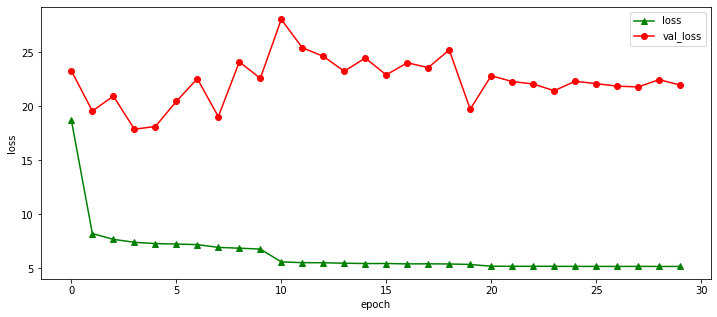

In [66]:
print(train_model.history.keys())

# summarize history for accuracy
# plt.plot(train_model_vanilla.history['acc'], '-o', color = 'red')
plt.plot(train_model.history['loss'],'-^', color = 'green')
plt.plot(train_model.history['val_loss'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
# plt.savefig('vanilla_lstm_loss_vs_epoch_shuffle_false.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [67]:
# model.save_weights("CONV_LSTM_model.h5")
model.save("CONV_LSTM_model.h5")

In [68]:
from keras.models import load_model
load_trained_CONV_LSTM=load_model("CONV_LSTM_model.h5")
# load_trained_model=load_model("/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/CONV_LSTM_model.h5")

In [69]:
X_Conv_Lstm_test, y_Conv_Lstm_test = split_sequence(multiple_ip_test_set, number_of_step_lstm)
print('X_Conv_Lstm_test shape: ', X_Conv_Lstm_test.shape,'\t X_Conv_Lstm_test dimension: ', X_Conv_Lstm_test.ndim)
print('y_Conv_Lstm_test shape: ', y_Conv_Lstm_test.shape,'\t y_Conv_Lstm_test dimension: ', y_Conv_Lstm_test.ndim)

test_sample = X_Conv_Lstm_test.shape[0]
# x_input = X_Conv_Lstm_test.reshape((X_Conv_Lstm_test.shape[0], n_seq, 1, n_steps_2, X_Conv_Lstm_test.shape[2]))
x_input = X_Conv_Lstm_test.reshape((test_sample, time, rows, cols, channels))

X_Conv_Lstm_test shape:  (198, 2, 9) 	 X_Conv_Lstm_test dimension:  3
y_Conv_Lstm_test shape:  (198,) 	 y_Conv_Lstm_test dimension:  1


In [70]:
yhat = model.predict(x_input, verbose=1)

198/198 [==============================] - 0s 697us/step


In [71]:
yhat_loaded = load_trained_CONV_LSTM.predict(x_input, verbose=1)

198/198 [==============================] - 0s 705us/step


In [72]:
y_Conv_Lstm_test_reshape = np.reshape(y_Conv_Lstm_test,(-1,1))
y_Conv_Lstm_test_reshape.shape

(198, 1)

<class 'numpy.ndarray'>


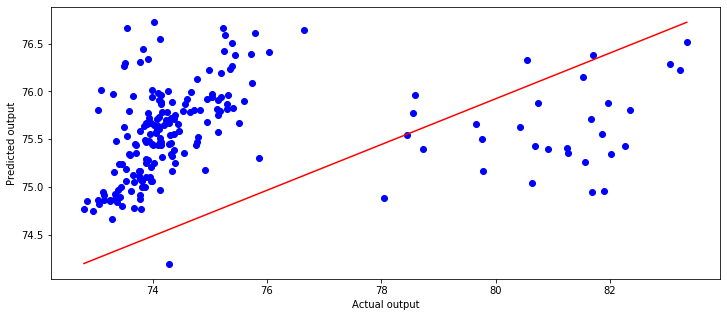

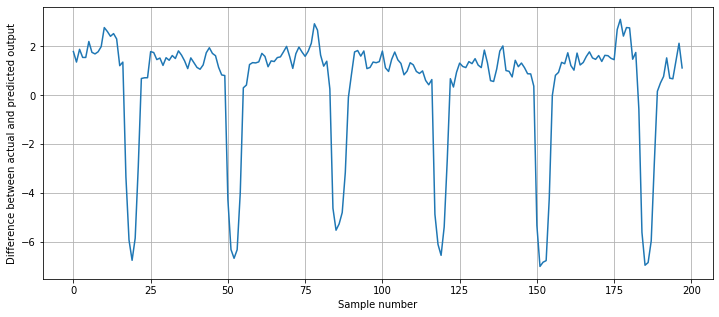

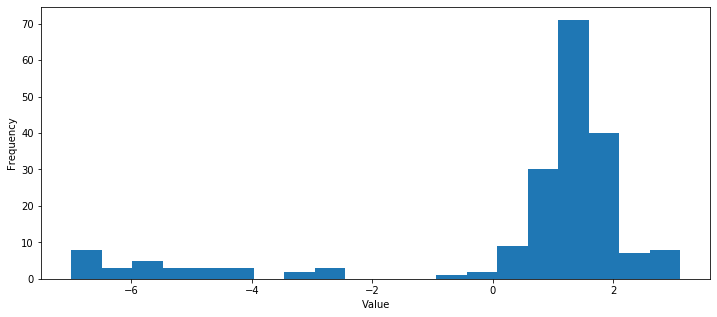

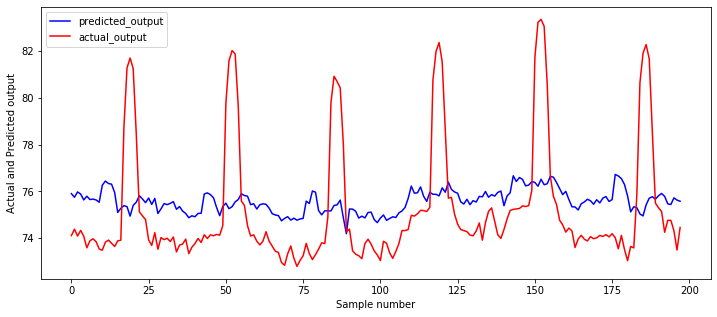

<Figure size 864x360 with 0 Axes>

In [73]:
plot_graph(y_Conv_Lstm_test_reshape, yhat, final_directory,'CONV_LSTM')

In [74]:
evaluation_metrices(y_Conv_Lstm_test_reshape, yhat_loaded, final_directory, 'CONV_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.02
Mean_absolute_error: 1.99
Mean squared error: 6.47
RMSE:  2.5439631529387787
!!!!---------------!!!!----------------!!!!


In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)

# VANILLA LSTM

In [50]:
multiple_ip_train_data, multiple_ip_test_set = make_dataset_LSTM(dataframe_interpolate, required_number_of_test_data)

go_for_training:  69103
required_number_of_test_data:  200
percentage:  0.9971141220437788
dataset length:  69303
Number of Elements for training:  69103
LSTM train set:  (69103, 4)
LSTM test set:  (200, 4)


In [51]:
X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data, number_of_step_lstm)
# X_train_vanilla, y_train_vanilla = split_sequence(multiple_ip_train_data,5)

In [52]:
print('X_train_vanilla shape: ',X_train_vanilla.shape,'\t dimension: ',X_train_vanilla.ndim,'\t size: ',X_train_vanilla.size)
print('y_train_vanilla shape: ',y_train_vanilla.shape,'\t dimension: ',y_train_vanilla.ndim,'\t size: ',y_train_vanilla.size)

X_train_vanilla shape:  (69101, 2, 3) 	 dimension:  3 	 size:  414606
y_train_vanilla shape:  (69101,) 	 dimension:  1 	 size:  69101


In [53]:
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], X_train_vanilla.shape[-1]))
print(X_train_vanilla.shape)

(69101, 2, 3)


In [54]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.layers import Bidirectional
from keras import optimizers

In [55]:
def vanilla_lstm(n_steps_vanilla, n_features_vanilla):
    model = Sequential()
#     model.add(LSTM(units=100, activation='relu', batch_input_shape=(8,n_steps_vanilla,n_features_vanilla)))
    model.add(LSTM(units=100, activation='relu', input_shape=(n_steps_vanilla, n_features_vanilla),return_sequences=False)) # make False if use only 1 layer.
                                                                                                                                                                #make True if need multi layer
#     model.add(LSTM(100,return_sequences=True))
#     model.add(LSTM(100))
#     model.add(Dropout(0.5))
    model.add(Dense(1))
    return model

In [56]:
n_steps_vanilla = number_of_step_lstm
# n_steps_vanilla = 5
n_features_vanilla = X_train_vanilla.shape[-1]
vanilla_model = vanilla_lstm(n_steps_vanilla, n_features_vanilla)

W0210 00:17:33.233154 139729803282240 deprecation.py:506] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [57]:
vanilla_model.compile(optimizer='adam', loss='mse',metrics=['mse','accuracy'])

In [58]:
vanilla_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               41600     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [59]:
train_model_vanilla = vanilla_model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.2,
                                        shuffle=True,callbacks=[LearningRateScheduler(lr_schedule)])

W0210 00:17:37.577850 139729803282240 deprecation.py:323] From /home/atif/iai_ml_venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55280 samples, validate on 13821 samples
Epoch 1/30
55280/55280 [==============================] - 7s 123us/step - loss: 13.8604 - mean_squared_error: 13.8604 - acc: 1.8090e-05 - val_loss: 3.1517 - val_mean_squared_error: 3.1517 - val_acc: 0.0000e+00
Epoch 2/30
55280/55280 [==============================] - 6s 117us/step - loss: 4.6335 - mean_squared_error: 4.6335 - acc: 1.8090e-05 - val_loss: 8.0172 - val_mean_squared_error: 8.0172 - val_acc: 0.0000e+00
Epoch 3/30
55280/55280 [==============================] - 6s 117us/step - loss: 3.8844 - mean_squared_error: 3.8844 - acc: 1.8090e-05 - val_loss: 2.7626 - val_mean_squared_error: 2.7626 - val_acc: 0.0000e+00
Epoch 4/30
55280/55280 [==============================] - 7s 120us/step - loss: 3.4680 - mean_squared_error: 3.4680 - acc: 1.8090e-05 - val_loss: 1.5561 - val_mean_squared_error: 1.5561 - val_acc: 0.0000e+00
Epoch 5/30
55280/55280 [==============================] - 6s 117us/step - loss: 3.7543 - mean_squared_error: 3.7543 

In [60]:
print(train_model_vanilla.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_acc', 'loss', 'mean_squared_error', 'acc'])


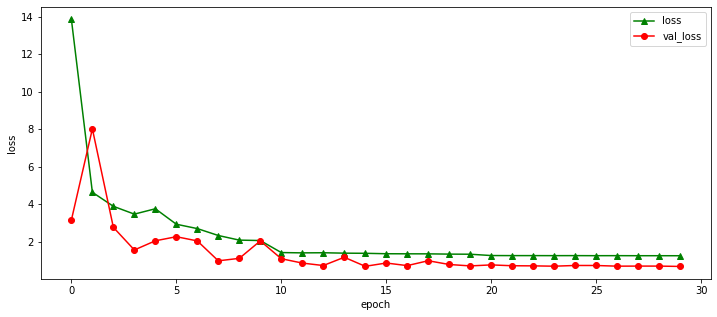

In [70]:
# summarize history for accuracy
# plt.plot(train_model_vanilla.history['acc'], '-o', color = 'red')
plt.plot(train_model_vanilla.history['loss'],'-^', color = 'green')
plt.plot(train_model_vanilla.history['val_loss'],'-o', color = 'red')
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='best')
plt.savefig('vanilla_lstm_loss_vs_epoch_shuffle_TRUE.png',bbox_inches='tight')
plt.rcParams['figure.figsize'] =(12,5)

In [62]:
vanilla_model.save("VANILLA_LSTM.h5")

In [63]:
from keras.models import load_model
load_trained_VANILLA_LSTM=load_model("VANILLA_LSTM.h5")

In [64]:
test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,number_of_step_lstm)
# test_ip_vanilla,test_op_vanilla=split_sequence(multiple_ip_test_set,1)
n_features_test = test_ip_vanilla.shape[-1]
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features_test))

In [65]:
yhat_vanilla_loaded = vanilla_model.predict(X_test_ip_vanilla, verbose=1)
print(yhat_vanilla_loaded.shape)

198/198 [==============================] - 0s 589us/step
(198, 1)


In [66]:
# evaluate the model
_, train_mse = vanilla_model.evaluate(X_train_vanilla, y_train_vanilla, verbose=0)
_, test_mse = vanilla_model.evaluate(X_test_ip_vanilla, test_op_vanilla, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

ValueError: too many values to unpack (expected 2)

In [67]:
evaluation_metrices(test_op_vanilla, yhat_vanilla_loaded, final_directory, 'VANILLA_LSTM',evaluation_metrics_file_path)

r_2 statistic: 0.83
Mean_absolute_error: 0.74
Mean squared error: 1.13
RMSE:  1.0610425706187006
!!!!---------------!!!!----------------!!!!


In [68]:
test_op_vanilla_reshape = np.reshape(test_op_vanilla,(-1,1))
print(test_op_vanilla_reshape.shape)
print(yhat_vanilla_loaded.shape)

(198, 1)
(198, 1)


<class 'numpy.ndarray'>


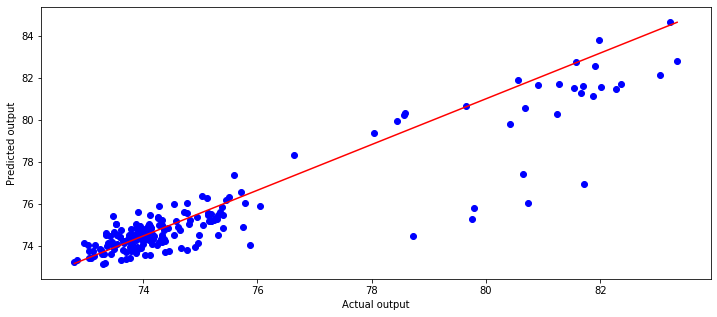

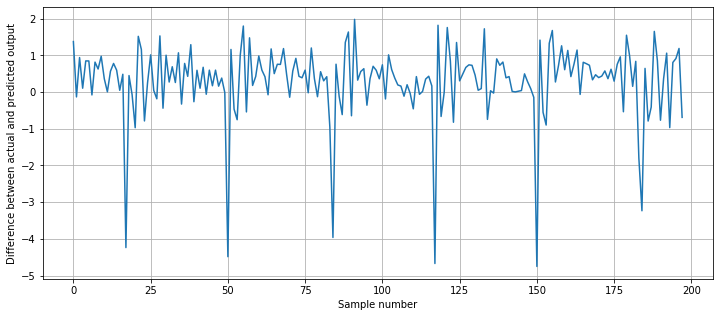

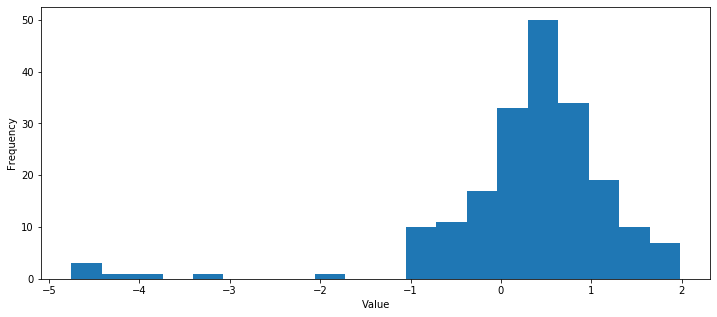

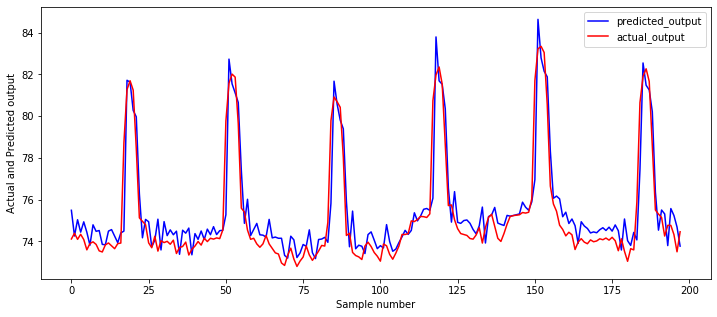

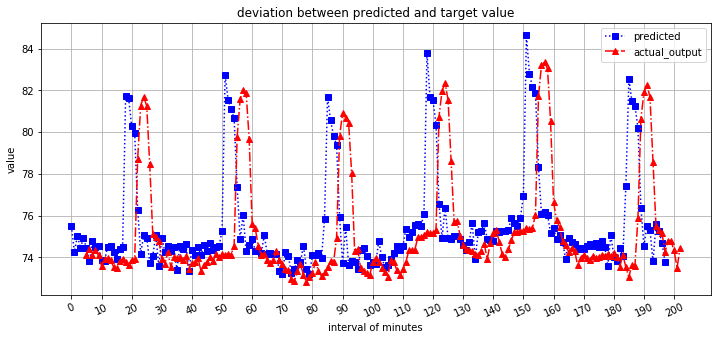

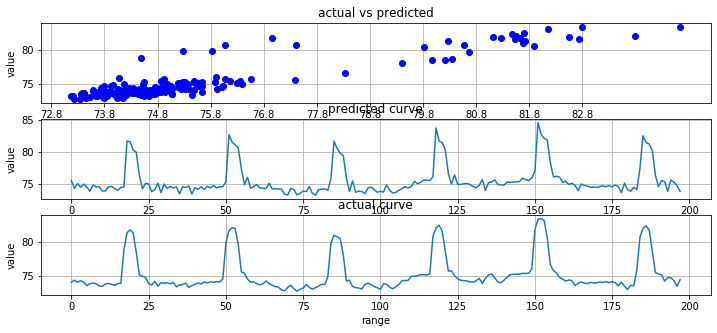

In [69]:
import shutil
plot_graph(test_op_vanilla_reshape, yhat_vanilla_loaded, final_directory,'vanilla_LSTM')

In [ ]:
import numpy as np
A = [12,3,4,5,6,7,8,9,12,10,201,202,21,-2,-3]

In [ ]:
A = np.array(A)
print(type(A))
print(A.shape)

In [ ]:
print(A[0:])

In [ ]:
print(A[-1:])

In [ ]:
print(A[-5:])

# ARIMA TESTING

In [72]:
df = dataframe_interpolate[[target_column]]
# df = dataframe_no_string[[target_column]]

In [73]:
type(df)

pandas.core.frame.DataFrame

In [74]:
df.shape

(69303, 1)

In [59]:
# df

In [119]:
# df_1 = dataframe_no_string.iloc[:,-1]
# type(df_1)

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# from numpy import log
# result = adfuller(df_1.values.dropna())
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

In [75]:
print(df.shape)
# print(df_1.shape)

(69303, 1)


In [76]:
%matplotlib inline
import re
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [77]:
stat, p = stats.normaltest(df.iloc[:,-1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=1425.915, p=0.000
Data does not look Gaussian (reject H0)


69303
34651
(34651, 1) ********** (34651, 1)
75.010641210506 ********** 75.79891796863281
16.509909198677622 ********** 13.561516583684266


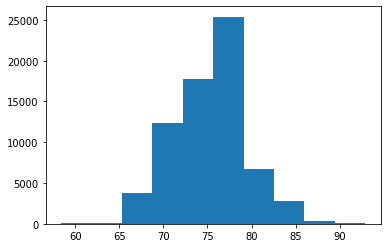

In [78]:
X_hist = df.values
# print(type(X_hist))

X_hist_len = len(X_hist)
print(X_hist_len)
split_len = int(len(X_hist)/2)
print(split_len)

X1, X2 = X_hist[:split_len],X_hist[split_len:-1]
print(X1.shape,'*'*10,X2.shape)

mean_X1, mean_X2 = X1.mean(), X2.mean()
print(mean_X1,'*'*10,mean_X2)

var_X1,var_X2 = X1.var(), X2.var()
print(var_X1,'*'*10,var_X2)

plt.hist(df.iloc[:,-1], bins=10)
plt.show()

In [79]:
total_mean = X_hist.mean()
total_var = X_hist.var()

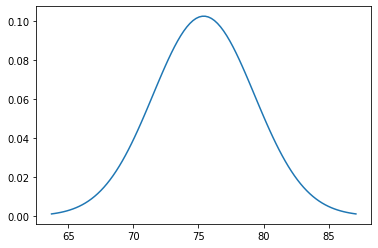

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = total_mean
variance = total_var
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# plt.hist(df.iloc[:,-1])
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.savefig('gaussian_distribution_target_variable.png')
plt.show()

In [82]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
#     plt.savefig('check_stationarity.jpg')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC',regression='c')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    p_value = dfoutput['p-value']
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s-------)'%key] = value
    print(dfoutput) 
    
    if p_value <= 0.05:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
    

In [83]:
df.shape

(69303, 1)

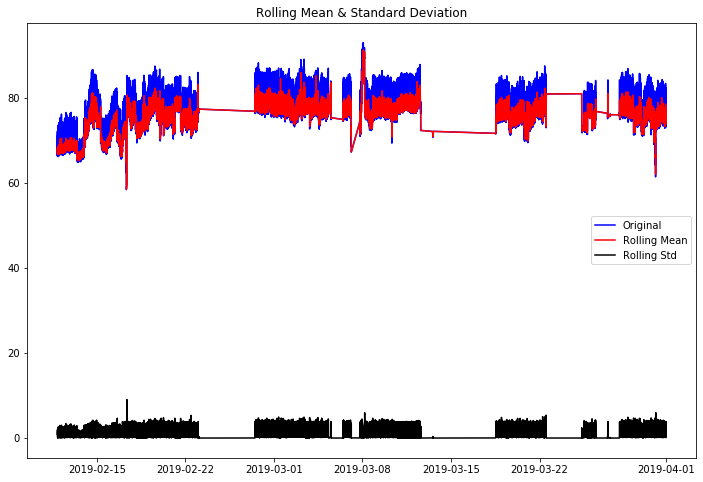

Results of Dickey-Fuller Test:
Test Statistic                -6.357592e+00
p-value                        2.520367e-08
#Lags Used                     6.200000e+01
Number of Observations Used    6.924000e+04
Critical Value (1%-------)    -3.430444e+00
Critical Value (5%-------)    -2.861582e+00
Critical Value (10%-------)   -2.566792e+00
dtype: float64
 => P-Value = 2.5203668932638235e-08. Rejecting Null Hypothesis.
 => Series is Stationary.


In [84]:
test_stationarity(df.iloc[:,-1])

<Figure size 432x288 with 0 Axes>

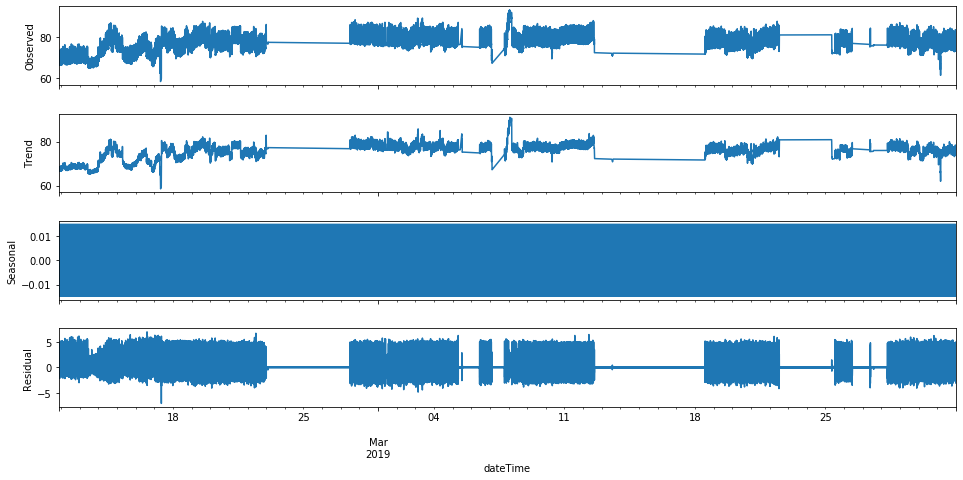

In [85]:
decomposition = seasonal_decompose(df.iloc[:,-1], freq=12)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
# plt.savefig('check_fig_with_staionarity.jpg')

In [86]:
n_sample = df.shape[0]
print(n_sample)

69303


In [87]:
n_train=int(0.995*n_sample)+1
n_forecast=n_sample-n_train

ts_train = df.iloc[:n_train][target_column]
ts_test = df.iloc[n_train:][target_column]
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.head(), "\n")
print("Testing Series:", "\n", ts_test.head())

(68957,)
(346,)
Training Series: 
 dateTime
2019-02-11 20:57:00    66.387058
2019-02-11 20:58:00    66.765225
2019-02-11 20:59:00    66.767387
2019-02-11 21:00:00    66.859457
2019-02-11 21:01:00    66.869962
Freq: T, Name: AEWIHO_T9AV2, dtype: float64 

Testing Series: 
 dateTime
2019-03-31 18:14:00    81.925250
2019-03-31 18:15:00    82.348834
2019-03-31 18:16:00    82.198988
2019-03-31 18:17:00    79.755119
2019-03-31 18:18:00    76.019798
Freq: T, Name: AEWIHO_T9AV2, dtype: float64


In [88]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

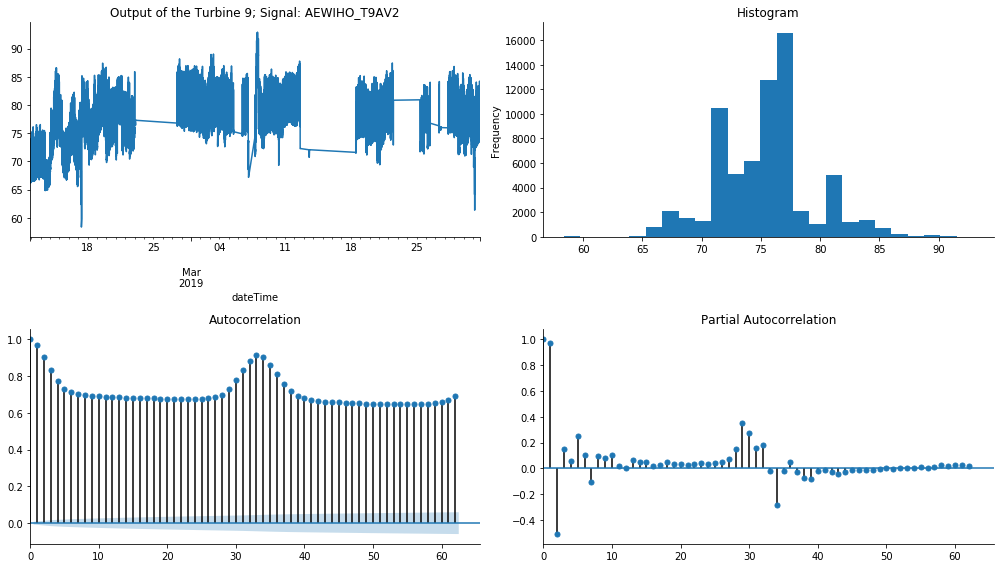

In [89]:
tsplot(ts_train, title='Output of the Turbine 9; Signal: '+str(target_column), lags=62)
plt.savefig('All ARIMA.jpg')

In [90]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

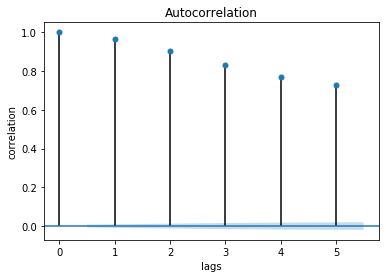

In [96]:
plot_acf(df.iloc[:,-1], lags=5)
plt.xlabel('lags')
plt.ylabel('correlation')
plt.savefig('acf plot code.png',bbox_inches='tight')
pyplot.show()

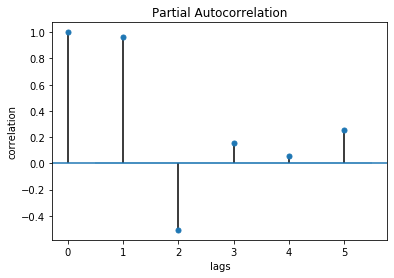

In [95]:
plot_pacf(df.iloc[:,-1], lags=5)
plt.xlabel('lags')
plt.ylabel('correlation')
plt.savefig('pacf plot code.png',bbox_inches='tight')
pyplot.show()

In [97]:
df_log = np.log(df)

df_log_diff = df_log - df_log.shift()
df_log_diff.dropna(inplace=True)

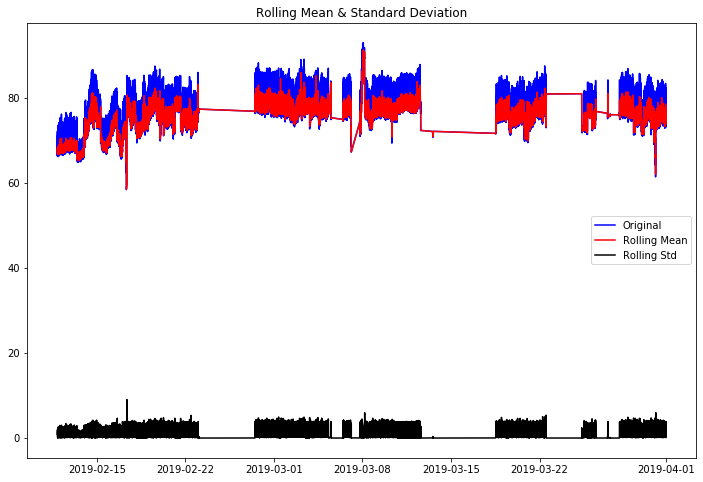

Results of Dickey-Fuller Test:
Test Statistic                -6.357592e+00
p-value                        2.520367e-08
#Lags Used                     6.200000e+01
Number of Observations Used    6.924000e+04
Critical Value (1%-------)    -3.430444e+00
Critical Value (5%-------)    -2.861582e+00
Critical Value (10%-------)   -2.566792e+00
dtype: float64
 => P-Value = 2.5203668932638235e-08. Rejecting Null Hypothesis.
 => Series is Stationary.


In [98]:
test_stationarity(df.iloc[:,-1])

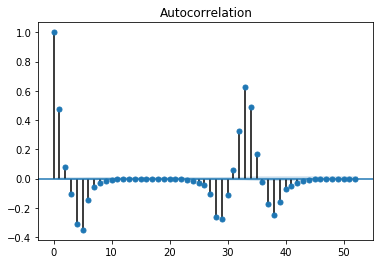

In [99]:
plot_acf(df_log_diff.iloc[:,-1], lags=52)
pyplot.show()

# plt.figure()

# plot_pacf(df_log_diff.iloc[:,-1], lags=52)
# pyplot.show()

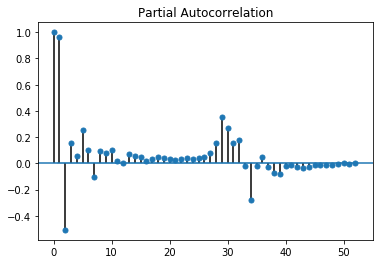

In [100]:
plot_pacf(df.iloc[:,-1], lags=52)
pyplot.show()

In [101]:
def make_dataset(PandaDataframe, test_set_number):
    dataset = np.array(PandaDataframe)
    
    go_for_training = int(len(dataset)-required_number_of_test_data)
    print(go_for_training)
    
    train_data = dataset[0:go_for_training]
    test_data = dataset[go_for_training:]

#     NumberOfElements = int(len(dataset)*0.9999)
#     print('dataset length: ',len(dataset))
#     print('Number of Elements for training: ',NumberOfElements)

#     train_data = dataset[0:NumberOfElements]
#     test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(df, test_set_number = 200)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

69103
train_set shape:  (69103, 1)
test_set shape:  (200, 1)


In [102]:
Actual = [x for x in train_set]
Predictions_ARIMA = list()

In [103]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
#     print('from function screaming')
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [104]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [105]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 2,0,0)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions_ARIMA.append(Prediction)
    Actual.append(ActualValue)

count=1, Actual=73.780151, Predicted=74.160618
count=2, Actual=74.426803, Predicted=73.603181
count=3, Actual=74.112900, Predicted=74.803620
count=4, Actual=74.388801, Predicted=74.016802
count=5, Actual=74.094980, Predicted=74.578991
count=6, Actual=74.336587, Predicted=74.009973
count=7, Actual=74.086329, Predicted=74.511906
count=8, Actual=73.592612, Predicted=74.023894
count=9, Actual=73.893230, Predicted=73.430677
count=10, Actual=73.976340, Predicted=74.120346
count=11, Actual=73.853065, Predicted=74.088790
count=12, Actual=73.543488, Predicted=73.866651
count=13, Actual=73.490656, Predicted=73.477580
count=14, Actual=73.831129, Predicted=73.557870
count=15, Actual=73.922272, Predicted=74.081554
count=16, Actual=73.783549, Predicted=74.041457
count=17, Actual=73.647607, Predicted=73.792693
count=18, Actual=73.888286, Predicted=73.664847
count=19, Actual=73.918255, Predicted=74.085161
count=20, Actual=78.728446, Predicted=74.006533
count=21, Actual=81.269947, Predicted=81.010409
c

count=171, Actual=74.069337, Predicted=73.922652
count=172, Actual=73.980356, Predicted=74.228389
count=173, Actual=74.017431, Predicted=74.005307
count=174, Actual=74.122169, Predicted=74.104615
count=175, Actual=74.076752, Predicted=74.238574
count=176, Actual=74.156772, Predicted=74.119085
count=177, Actual=74.057905, Predicted=74.258908
count=178, Actual=74.192921, Predicted=74.074003
count=179, Actual=74.029790, Predicted=74.321220
count=180, Actual=73.550285, Predicted=74.014612
count=181, Actual=74.121551, Predicted=73.397964
count=182, Actual=73.522169, Predicted=74.475069
count=183, Actual=73.043282, Predicted=73.310319
count=184, Actual=73.649152, Predicted=72.916273
count=185, Actual=73.590140, Predicted=74.043536
count=186, Actual=75.866245, Predicted=73.649546
count=187, Actual=80.643686, Predicted=77.000097
count=188, Actual=81.903005, Predicted=82.813682
count=189, Actual=82.268195, Predicted=82.222528
count=190, Actual=81.664797, Predicted=82.115279
count=191, Actual=78

In [106]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions_ARIMA)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions_ARIMA))
print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 1.220
size of prediction:  200
size of actual:  69303


In [107]:
print(type(Predictions_ARIMA))
predictions_array = np.array(Predictions_ARIMA)
print(type(predictions_array))
print(predictions_array.shape)
print(type(test_set))
print(test_set.shape)

<class 'list'>
<class 'numpy.ndarray'>
(200, 1)
<class 'numpy.ndarray'>
(200, 1)


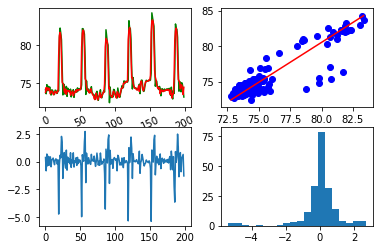

In [105]:
plt.subplot(2,2,1)
plt.plot(Predictions_ARIMA,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)

plt.subplot(2,2,2)
plt.plot((min(test_set), max(test_set)), (min(Predictions_ARIMA), max(Predictions_ARIMA)), color='red')
plt.scatter(test_set, Predictions_ARIMA, color='blue')


plt.subplot(2,2,3)
difference_of_value = Predictions_ARIMA - test_set
# print(type(difference_of_value))
plt.plot(difference_of_value[:])

plt.subplot(2,2,4)
plt.hist(difference_of_value, bins=20)
plt.rcParams['figure.figsize'] =(12,5)
plt.show()

In [106]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_set, Predictions_ARIMA))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_set, Predictions_ARIMA))
print("Mean squared error: %.2f" % mean_squared_error(test_set, Predictions_ARIMA))
RMSE=math.sqrt(mean_squared_error(test_set, Predictions_ARIMA))
print('RMSE: ',RMSE)

r_2 statistic: 0.81
Mean_absolute_error: 0.62
Mean squared error: 1.22
RMSE:  1.104092394985222


In [140]:
# def plot_graph(test_output, predicted_output, final_directory,subfolder):
#     fig_location = final_directory + '/' + str(subfolder)

#     if not os.path.exists(fig_location):
#         os.makedirs(fig_location)
#     else:
#         shutil.rmtree(fig_location, ignore_errors=True)
#         os.makedirs(fig_location)

#     plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
#     plt.scatter(test_output, predicted_output, color='blue')
#     # plt.savefig(model+'_'+'figure_actual_vs_predicted_with_best_fit_line.jpg')
#     plt.xlabel('Actual output')
#     plt.ylabel('Predicted output')
# #     plt.title('scatter plotting of predicted_output alongside with the average line of test and predicted output')
#     plt.rcParams['figure.figsize'] =(12,5)
#     plt.savefig(fig_location + '/' + "scatter_test_pred" + '.jpg')
#     plt.show()


#     difference_of_value = predicted_output - test_output
#     print(type(difference_of_value))
#     plt.plot(difference_of_value[:])
# #     plt.title('observation of the difference of actual and predicted value')

#     # plt.rcParams['xtick.labelsize']=2
#     # plt.rcParams['ytick.labelsize']=2
#     # plt.tick_params(labelsize=20)
#     plt.ylabel('Difference between actual and predicted output')
#     plt.xlabel('Sample number')
#     plt.grid(b=None, which='both', axis='both')
#     plt.rcParams['figure.figsize'] =(12,5)
#     plt.savefig(fig_location + '/' + "difference_test_pred" + '.jpg')
#     plt.show()

#     plt.hist(difference_of_value, bins=20)
#     # plt.xlim(-10,10,1)
#     # plt.savefig(model+'_'+'histogram_of_difference_value.jpg')
#     plt.xlabel('Value')
#     plt.ylabel('Frequency')
# #     plt.title('histogram of value of difference')
#     plt.rcParams['figure.figsize'] =(12,5)
#     plt.savefig(fig_location + '/' + "error_histogram" + '.jpg')
#     plt.show()

#     plt.plot(predicted_output[0:len(predicted_output[0:])], color='blue')
#     plt.plot(test_output[0:], color='red')
# #     plt.xlim(0,40,1)
# #     plt.ylim(50,70,1)
# #     plt.savefig(model+'_'+'figure_difference_between_actual_and_predicted_value.jpg')
#     plt.xlabel('Sample number')
#     plt.ylabel('Actual and Predicted output')
# #     plt.title('Visualization of test and predicted output in the same timestamp')
#     plt.legend(['predicted_output','actual_output'], loc='best')
#     plt.rcParams['figure.figsize'] =(12,5)
#     plt.savefig(fig_location + '/' + "test_and_pred" + '.jpg')
#     plt.show()

<class 'numpy.ndarray'>


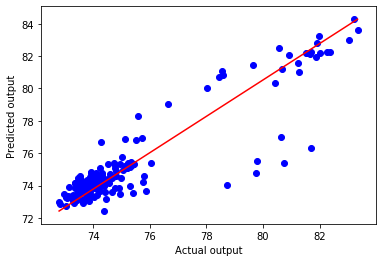

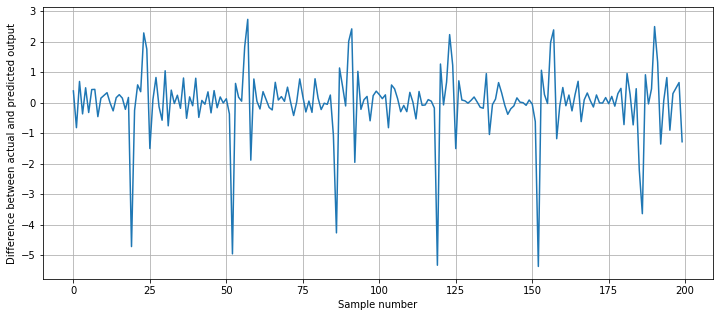

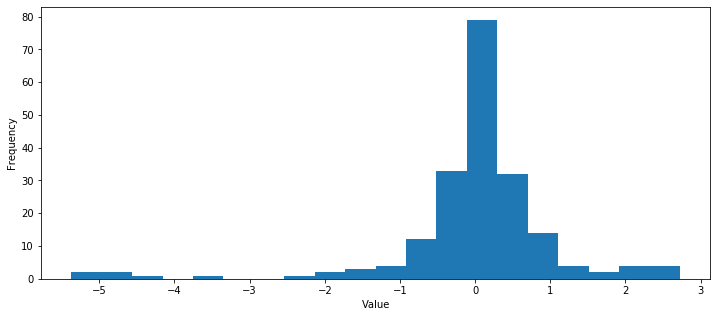

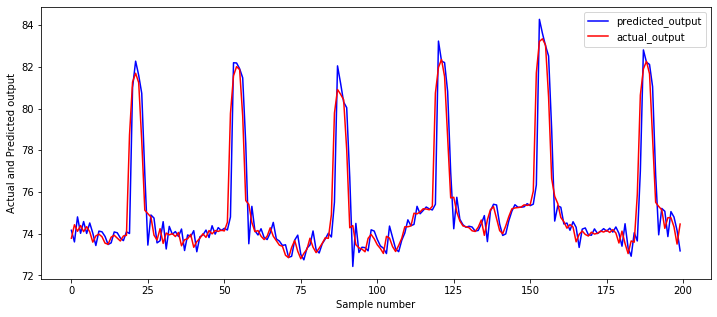

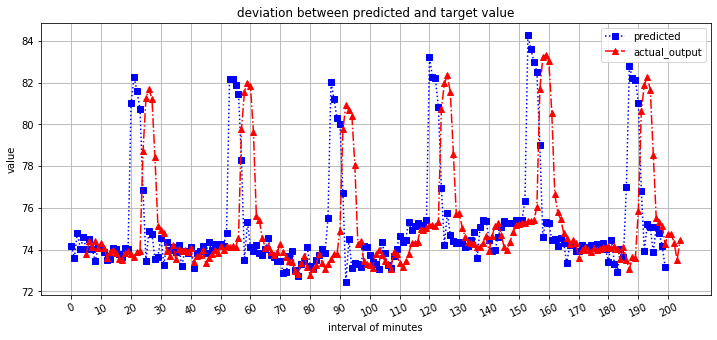

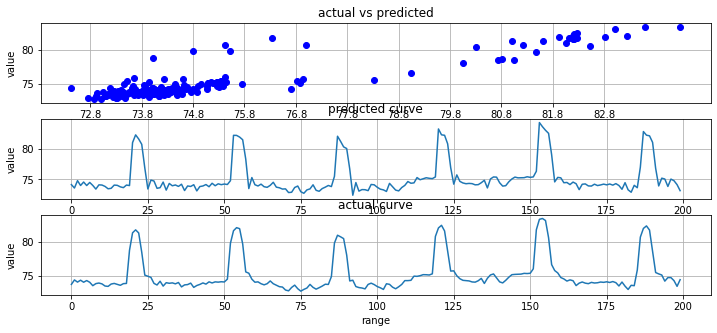

In [109]:
plot_graph(test_set, Predictions_ARIMA, final_directory, 'ARIMA_200')

In [108]:
evaluation_metrices(test_set, Predictions_ARIMA,final_directory,'ARIMA_200', evaluation_metrics_file_path)

r_2 statistic: 0.81
Mean_absolute_error: 0.62
Mean squared error: 1.22
RMSE:  1.104480703879618
!!!!---------------!!!!----------------!!!!


# auto arima

In [54]:
from pmdarima.arima import auto_arima

In [66]:
#divide into train and validation set
train = df[:int(0.9999*(len(df)))]
test = df[int(0.9999*(len(df))):]
print(train.shape)
print(test.shape)

(69296, 1)
(7, 1)


In [ ]:
#training model
model_auto_arima = auto_arima(train, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
#fitting model
model_auto_arima.fit(train)

In [ ]:
#predicting values and evaluating model
y_pred_auto_arima = model_auto_arima.predict(n_periods=len(valid))
from sklearn.metrics import r2_score
acc = r2_score(valid.values, y_pred_auto_arima)
print(acc)